# Import

In [1]:
import os
import torch
from torchvision import transforms
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
from sklearn.metrics import confusion_matrix
import shutil
import random
import cv2
import numpy as np
from collections import Counter
import pandas as pd
import imgaug as ia
from imgaug import augmenters as iaa
from pathlib import Path
from glob import glob
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow import keras
import sys
import seaborn as sns


# Check trọng số ( THAY ĐƯỜNG DẪN model.load_weight() )

In [160]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys

directory = "Data-centric/"
user_data = directory + "clean/augmented_8_2"
test_data = directory + "label_book"                # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":

    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )    
    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",  
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )
    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )
    # Define the model architecture (must match the architecture when saving weights)
    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    # Compile the model (this step is required before loading weights)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    # Load the weights from the checkpoint
    model.load_weights("Weight/Augment_82/best_model")                    ######################### THAY ĐƯỜNG DẪN CHECK WEIGHT
    train_loss, train_acc = model.evaluate(train)
    print(f"Loaded model - train_loss: {train_loss}, train_acc: {train_acc}")
    val_loss, val_acc = model.evaluate(valid)
    print(f"Loaded model - val_loss: {val_loss}, val_acc: {val_acc}")
    # Now the model is ready to use, you can evaluate or predict using this model
    loss, acc = model.evaluate(test)  # Assuming `valid` is your validation dataset
    print(f"Loaded model - loss: {loss}, accuracy: {acc}")
    

Found 8000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


1000/1000 [==============================] - 17s 15ms/step - loss: 0.1079 - accuracy: 0.9672
Loaded model - train_loss: 0.1079438254237175, train_acc: 0.9672499895095825
250/250 [==============================] - 4s 15ms/step - loss: 0.3175 - accuracy: 0.9030
Loaded model - val_loss: 0.3174939751625061, val_acc: 0.902999997138977
7/7 [==============================] - 0s 11ms/step - loss: 0.7075 - accuracy: 0.8077
Loaded model - loss: 0.7075455784797668, accuracy: 0.807692289352417


7/7 [==============================] - 0s 10ms/step
True Classes: 
 [ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  9  9  9
  9  9  5  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8 10
 10 10 10 10]
Predicted Classes: 
 [ 5  1  1  1  1  2  2  2  2  2  3  3  1  3  3  3  4  4  3  4  4  9  9  4
  9  9  5  5  1  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8 10
 10 10 10 10]


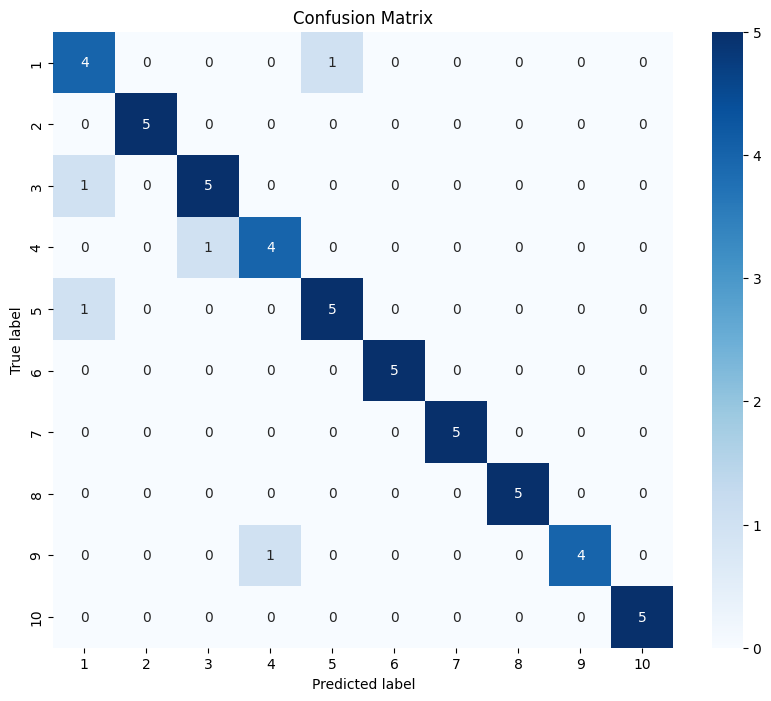

In [92]:
# Dự đoán
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Nhãn thực tế
true_classes = np.concatenate([y.numpy() for _, y in test])  # Gộp nhãn từ các batch
true_classes = np.argmax(true_classes, axis=1)

# Tăng nhãn lên 1 để bắt đầu từ 1
true_classes += 1
predicted_classes += 1

# Tính ma trận
cm = confusion_matrix(true_classes, predicted_classes)

# Hiển thị nhãn dự đoán và nhãn thực tế
print("True Classes: \n", true_classes)
print("Predicted Classes: \n", predicted_classes)

# Vẽ ma trận 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, cm.shape[1]+1), yticklabels=np.arange(1, cm.shape[0]+1))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# BaseLine

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys

directory = "Data-centric/"
user_data = directory + "data"
valid_data = directory + "data"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length >= 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 2067 files belonging to 10 classes.
Found 813 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_1  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_2 (Functional)        (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_1  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                           

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Load Data

## Create Folder new folder

In [65]:
# Create new directory to store cleaned images (copy raw data)
CLEAN_DATA_FOLDER = 'Data-centric/clean'
TRAIN_DATA_CLEAN = f'{CLEAN_DATA_FOLDER}/train'
VALID_DATA_CLEAN = f'{CLEAN_DATA_FOLDER}/val'
LABEL_BOOK = 'Data-centric/label_book'


In [41]:
try:
    shutil.copytree('Data-centric/data', CLEAN_DATA_FOLDER, dirs_exist_ok=False)
    print('Created new folder')
except:
    print('Folder already exists')

Created new folder


### Rename

In [22]:
TRAIN_DATA_COMBINE='Data-centric/clean/Combined Handwritten Roman Numerals Dataset/train'
VAL_DATA_COMBINE='Data-centric/clean/Combined Handwritten Roman Numerals Dataset/val'

In [23]:
# Rename files in train and val sets (in new clean folder) for easier tracking
data_types = [TRAIN_DATA_COMBINE, VAL_DATA_COMBINE]

for data_type in data_types:
    for folder in os.listdir(data_type):
          for index, file in enumerate(os.listdir(data_type + '/' + folder)):
                data_type_name = data_type.split('/')[-1]
                os.rename(os.path.join(data_type, folder, file), os.path.join(data_type, folder, ''.join([str(data_type_name), '_', str(folder), '_', str(index),'.png'])))

In [21]:
RAW_DATA_FOLDER = 'Data-centric/'
TRAIN_DATA = f'{RAW_DATA_FOLDER}/data/train'
VALID_DATA = f'{RAW_DATA_FOLDER}/data/val'
LABEL_BOOK = f'{RAW_DATA_FOLDER}/label_book'
print(f'Train data folder: {os.listdir(TRAIN_DATA)}')
print(f'Validation data folder: {os.listdir(VALID_DATA)}')
print(f'Label book data folder: {os.listdir(LABEL_BOOK)}')

Train data folder: ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']
Validation data folder: ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']
Label book data folder: ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']


## Check số lượng data của từng tập

In [12]:
TRAIN_DATA_GOC='Data-centric/data/train'
VALID_DATA_GOC='Data-centric/data/val'

In [13]:
train_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(TRAIN_DATA_GOC) for filename in filenames])
valid_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(VALID_DATA_GOC) for filename in filenames])
label_book_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(LABEL_BOOK) for filename in filenames])

# Print the total number of images in each set
print(f'Total number of train images: {train_img_count}')
print(f'Total number of validation images: {valid_img_count}')
print(f'Total number of label book images: {label_book_count}')

Total number of train images: 2067
Total number of validation images: 813
Total number of label book images: 52


In [14]:
# Function to count images in each subfolder
def count_images_in_folders(base_dir):
    folder_counts = []
    for dirpath, _, filenames in os.walk(base_dir):
        if filenames:  # Ensure there are images in the folder
            label = os.path.basename(dirpath)  # Get the last folder as the label (i, ii, iii,...x)
            count = len(filenames)
            folder_counts.append({'label': label, 'count': count, 'type': base_dir.split('/')[-1]})
    return folder_counts

# Count images in each set
train_counts = count_images_in_folders(TRAIN_DATA_GOC)
val_counts = count_images_in_folders(VALID_DATA_GOC)
label_book_counts = count_images_in_folders(LABEL_BOOK)
train_counts, val_counts, label_book_counts

([{'label': 'i', 'count': 261, 'type': 'train'},
  {'label': 'ii', 'count': 157, 'type': 'train'},
  {'label': 'iii', 'count': 186, 'type': 'train'},
  {'label': 'iv', 'count': 281, 'type': 'train'},
  {'label': 'ix', 'count': 234, 'type': 'train'},
  {'label': 'v', 'count': 196, 'type': 'train'},
  {'label': 'vi', 'count': 181, 'type': 'train'},
  {'label': 'vii', 'count': 193, 'type': 'train'},
  {'label': 'viii', 'count': 199, 'type': 'train'},
  {'label': 'x', 'count': 179, 'type': 'train'}],
 [{'label': 'i', 'count': 82, 'type': 'val'},
  {'label': 'ii', 'count': 81, 'type': 'val'},
  {'label': 'iii', 'count': 79, 'type': 'val'},
  {'label': 'iv', 'count': 84, 'type': 'val'},
  {'label': 'ix', 'count': 81, 'type': 'val'},
  {'label': 'v', 'count': 83, 'type': 'val'},
  {'label': 'vi', 'count': 82, 'type': 'val'},
  {'label': 'vii', 'count': 77, 'type': 'val'},
  {'label': 'viii', 'count': 83, 'type': 'val'},
  {'label': 'x', 'count': 81, 'type': 'val'}],
 [{'label': 'i', 'count': 

In [15]:
class_labels = ['i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x']

train_class_counts = {}
val_class_counts = {}
for class_label in class_labels:
    train_count = len(os.listdir(os.path.join(TRAIN_DATA_GOC, class_label)))
    val_count = len(os.listdir(os.path.join(VALID_DATA_GOC, class_label)))
    tong_class = train_count + val_count
    print(f"Tổng số lượng của class {class_label}: {tong_class}")
    # train_class_counts[class_label] = train_count
    # val_class_counts[class_label] = val_count
    

Tổng số lượng của class i: 343
Tổng số lượng của class ii: 238
Tổng số lượng của class iii: 265
Tổng số lượng của class iv: 365
Tổng số lượng của class v: 279
Tổng số lượng của class vi: 263
Tổng số lượng của class vii: 270
Tổng số lượng của class viii: 282
Tổng số lượng của class ix: 315
Tổng số lượng của class x: 260


In [16]:
# Combine all counts into a dataframe
df_counts = pd.DataFrame(train_counts + val_counts + label_book_counts)

# Plot the data using plotly express
fig = px.bar(df_counts, x='label', y='count', color='type', barmode='group',
             title="Number of Images in Train, Validation, and Label Book Datasets",
             labels={'label': 'Roman Numerals', 'count': 'Number of Images'})
fig.show()

# Lọc mislabel,unrelated

## Số lượng mislabel,unrelated

### Move file remove and mislabel

In [47]:
import os

# Define the base directory for mislabeled images
MISLABELED_DIR = "Data-centric/clean/mislabeled"
TRAIN_DIR = os.path.join(MISLABELED_DIR, "train")
VAL_DIR = os.path.join(MISLABELED_DIR, "val")

# Roman numeral labels from i to x
labels = ['i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x']

# Create directories for train and val sets for each Roman numeral
for label in labels:
    os.makedirs(os.path.join(TRAIN_DIR, label), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIR, label), exist_ok=True)

# Check if directories are created successfully
os.listdir(MISLABELED_DIR), os.listdir(TRAIN_DIR), os.listdir(VAL_DIR)


(['train', 'val'],
 ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x'],
 ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x'])

In [ ]:
import pandas as pd
import shutil
import os

# Đường dẫn đến file Excel
excel_file = 'roman-numerals-labeling-plb-20210830.xlsx'  # Thay đổi đường dẫn này cho phù hợp

# Đường dẫn đến thư mục 'clean'
clean_folder = os.path.join('data-centric', 'clean')  # Thay đổi nếu cần

# Đường dẫn đến các thư mục train, val, Remove
train_folder = os.path.join(clean_folder, 'train')
val_folder = os.path.join(clean_folder, 'val')
remove_folder = os.path.join(clean_folder, 'Remove')

# Đọc dữ liệu từ file Excel
try:
    df = pd.read_excel(excel_file)
except FileNotFoundError:
    print(f"Không tìm thấy file Excel tại đường dẫn: {excel_file}")
    exit(1)
except Exception as e:
    print(f"Lỗi khi đọc file Excel: {e}")
    exit(1)

# Hàm tạo các thư mục nếu chưa tồn tại
def create_folders(base_folder, subsets, labels):
    for subset in subsets:
        subset_path = os.path.join(base_folder, subset)
        if not os.path.exists(subset_path):
            os.makedirs(subset_path)
            print(f"Đã tạo thư mục: {subset_path}")
        for label in labels:
            label_path = os.path.join(subset_path, label)
            if not os.path.exists(label_path):
                os.makedirs(label_path)
                print(f"Đã tạo thư mục: {label_path}")

# Lấy danh sách các nhãn từ cột 'label'
labels = df['label'].dropna().unique()
labels = [str(label).strip() for label in labels]

# Tạo các thư mục Remove/train/<label> và Remove/val/<label>
create_folders(remove_folder, ['train', 'val'], labels)

# Hàm di chuyển file vào Remove dựa trên subset và label từ Excel
def move_to_remove(file_name, subset, label):
    subset = subset.lower().strip()
    label = label.strip()
    file_name = file_name.strip()
    
    # Xác định thư mục nguồn dựa trên subset
    if subset == 'train':
        src_dir = os.path.join(train_folder, label)
    elif subset == 'val':
        src_dir = os.path.join(val_folder, label)
    else:
        print(f"Giá trị subset '{subset}' không hợp lệ cho file {file_name}.")
        return
    
    src_path = os.path.join(src_dir, file_name)
    
    # Xác định thư mục đích trong Remove
    dest_dir = os.path.join(remove_folder, subset, label)
    dest_path = os.path.join(dest_dir, file_name)
    
    if not os.path.exists(src_path):
        print(f"Không tìm thấy file nguồn: {src_path}")
        return
    
    try:
        shutil.move(src_path, dest_path)
        print(f"Đã di chuyển '{file_name}' từ '{subset}/{label}' đến 'Remove/{subset}/{label}'")
    except Exception as e:
        print(f"Lỗi khi di chuyển '{file_name}': {e}")

# Duyệt qua từng hàng trong DataFrame và thực hiện di chuyển nếu cần
for index, row in df.iterrows():
    file_name = row.get('file')
    subset = row.get('subset')
    label = row.get('label')
    to_be_removed = row.get('to_be_removed')
    
    # Kiểm tra các giá trị không bị thiếu
    if pd.isnull(file_name) or pd.isnull(subset) or pd.isnull(label) or pd.isnull(to_be_removed):
        print(f"Hàng {index + 2} chứa giá trị thiếu. Bỏ qua.")
        continue
    
    # Kiểm tra giá trị to_be_removed
    if to_be_removed == 1:
        move_to_remove(file_name, subset, label)
    else:
        # Nếu bạn muốn thực hiện hành động nào đó với các file không bị loại bỏ
        pass  # Có thể thêm logic nếu cần

print("Hoàn thành quá trình di chuyển file.")


### Load mislabel,unrelated,dashed_line

### Unrelated (Remove)

In [134]:
# Define the paths to the directories
MISLABELED_DIR = "Data-centric/clean/mislabeled"
REMOVE_DIR = "Data-centric/clean/remove"

In [139]:
train_remove_dir=REMOVE_DIR +'/train'
val_remove_dir=REMOVE_DIR +'/val'

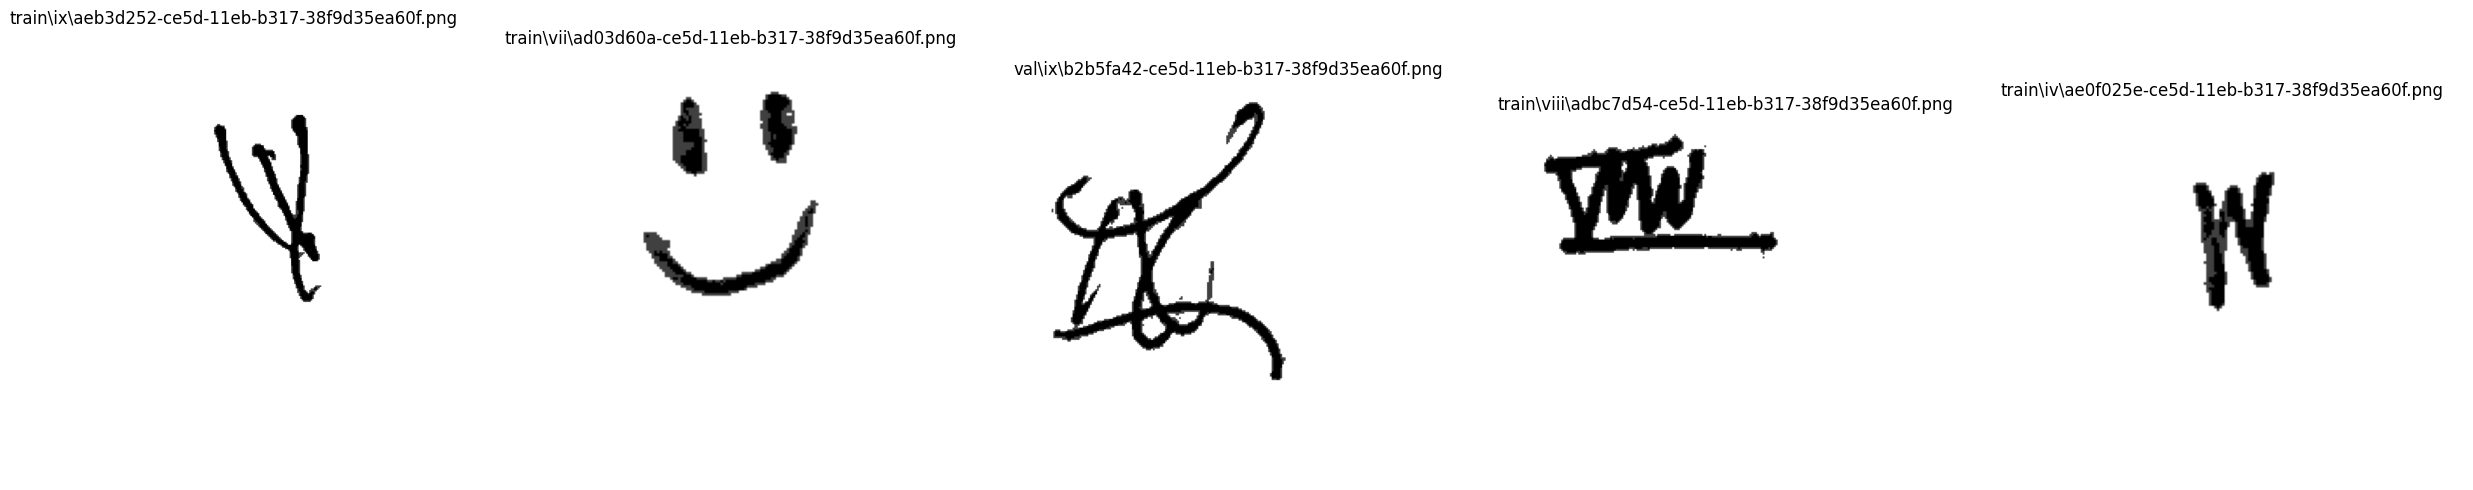

In [ ]:
# Tạo hình và trục để hiển thị ảnh
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# Lấy danh sách các thư mục con train và valid
subfolders = ['train', 'val']
random_files = []

# Duyệt qua từng thư mục con (train và valid)
for subfolder in subfolders:
    subfolder_path = os.path.join(REMOVE_DIR, subfolder)
    # Lấy danh sách các thư mục con từ i đến x
    labels = os.listdir(subfolder_path)
    
    for label in labels:
        label_path = os.path.join(subfolder_path, label)
        if os.path.isdir(label_path):  # Kiểm tra xem đó có phải là thư mục không
            files = os.listdir(label_path)
            # Lọc các file ảnh và thêm đường dẫn đầy đủ vào danh sách
            random_files.extend([os.path.join(label_path, file) for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])

# Chọn ngẫu nhiên 5 bức ảnh từ danh sách
random_files = random.sample(random_files, min(5, len(random_files)))

# Hiển thị các bức ảnh ngẫu nhiên
for i, img_path in enumerate(random_files):
    img = cv2.imread(img_path)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Tạo tiêu đề cho ảnh
    title = os.path.relpath(img_path, REMOVE_DIR)  # Tạo đường dẫn tương đối từ REMOVE_DIR
    axs[i].set_title(title)  # Hiển thị đường dẫn
    axs[i].axis('off')  # Xóa trục tọa độ oxy

plt.tight_layout()
plt.show()

In [140]:
train_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(train_remove_dir) for filename in filenames])
valid_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(val_remove_dir) for filename in filenames])

# Print the total number of images in each set
print(f'Total number of train images: {train_img_count}')
print(f'Total number of validation images: {valid_img_count}')

Total number of train images: 256
Total number of validation images: 23


In [141]:
# Count images in both train and val subfolders
train_counts_mislabel = count_images_in_folders(train_remove_dir)
val_counts_mislabel = count_images_in_folders(val_remove_dir)

# Combine train and val counts
df_counts = pd.DataFrame(train_counts_mislabel + val_counts_mislabel)

# Plot the data using plotly express
fig = px.bar(df_counts, x='label', y='count', color='type', barmode='group',
             title="REMOVE: Number of Images in Train and Validation Datasets",
             labels={'label': 'Roman Numerals', 'count': 'Number of Images'})
fig.show()

In [ ]:
# Function to count images in each folder
def count_images_in_folder(base_dir):
    return sum([len(filenames) for _, _, filenames in os.walk(base_dir)])

# Count images in each folder
mislabeled_count = count_images_in_folder(MISLABELED_DIR)
remove_count = count_images_in_folder(REMOVE_DIR)

# Create a dataframe for visualization
data = {
    'Category': ['Mislabeled', 'Remove'],
    'Image Count': [mislabeled_count, remove_count]
}

df = pd.DataFrame(data)

# Plot the data using plotly express
fig = px.bar(df, x='Category', y='Image Count', title="Number of Images in Mislabeled And Remove Folders",
             labels={'Image Count': 'Number of Images'})
fig.show()

### Mislabeled

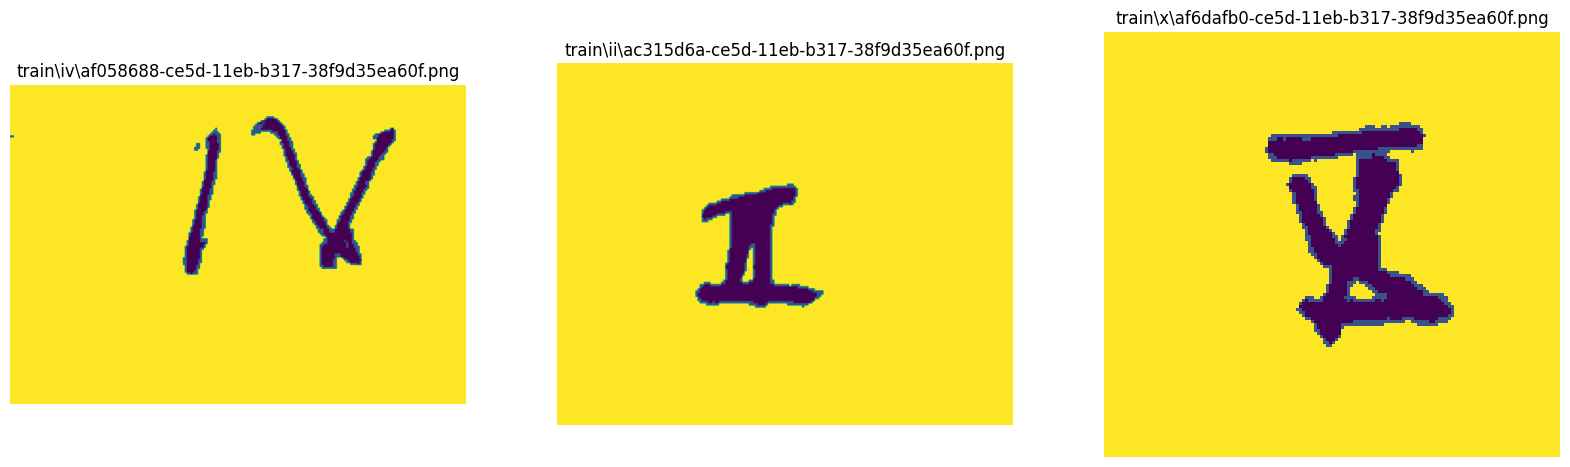

In [151]:
# Function to display random sample images from a given directory
def display_random_sample_images(base_dir, num_images=5):
    # List to store image paths
    image_paths = []
    
    # Iterate over the train and val subfolders
    for subset in ['train', 'val']:
        subset_dir = os.path.join(base_dir, subset)
        for label in os.listdir(subset_dir):
            label_dir = os.path.join(subset_dir, label)
            # Append image paths
            for img in os.listdir(label_dir):
                if img.endswith('.png'):
                    image_paths.append(os.path.join(label_dir, img))
    
    # Randomly select a few image paths
    sample_images = random.sample(image_paths, min(num_images, len(image_paths)))  # Random selection
    
    # Display the images
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(sample_images):
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        title = os.path.relpath(img_path, MISLABELED_DIR) 
        plt.axis('off')  # Hide axis
        plt.title(title)  # Show the filename as title
    plt.show()

# Display random sample images from the mislabeled directory
display_random_sample_images(MISLABELED_DIR, num_images=3)


In [71]:
train_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(TRAIN_DATA_CLEAN) for filename in filenames])
valid_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(VALID_DATA_CLEAN) for filename in filenames])

# Print the total number of images in each set
print(f'Total number of train images: {train_img_count}')
print(f'Total number of validation images: {valid_img_count}')

Total number of train images: 1726
Total number of validation images: 784


In [75]:
train_counts_clean = count_images_in_folders(TRAIN_DATA_CLEAN)
val_counts_clean = count_images_in_folders(VALID_DATA_CLEAN)
train_counts_clean,val_counts_clean

([{'label': 'i', 'count': 229, 'type': 'train'},
  {'label': 'ii', 'count': 129, 'type': 'train'},
  {'label': 'iii', 'count': 135, 'type': 'train'},
  {'label': 'iv', 'count': 247, 'type': 'train'},
  {'label': 'ix', 'count': 191, 'type': 'train'},
  {'label': 'v', 'count': 164, 'type': 'train'},
  {'label': 'vi', 'count': 153, 'type': 'train'},
  {'label': 'vii', 'count': 165, 'type': 'train'},
  {'label': 'viii', 'count': 161, 'type': 'train'},
  {'label': 'x', 'count': 152, 'type': 'train'}],
 [{'label': 'i', 'count': 80, 'type': 'val'},
  {'label': 'ii', 'count': 77, 'type': 'val'},
  {'label': 'iii', 'count': 77, 'type': 'val'},
  {'label': 'iv', 'count': 80, 'type': 'val'},
  {'label': 'ix', 'count': 77, 'type': 'val'},
  {'label': 'v', 'count': 79, 'type': 'val'},
  {'label': 'vi', 'count': 79, 'type': 'val'},
  {'label': 'vii', 'count': 74, 'type': 'val'},
  {'label': 'viii', 'count': 80, 'type': 'val'},
  {'label': 'x', 'count': 81, 'type': 'val'}])

In [76]:
# Combine all counts into a dataframe
df_counts = pd.DataFrame(train_counts_clean + val_counts_clean)

# Plot the data using plotly express
fig = px.bar(df_counts, x='label', y='count', color='type', barmode='group',
             title="Number of Images in Train, Validation, and Label Book Datasets",
             labels={'label': 'Roman Numerals', 'count': 'Number of Images'})
fig.show()

Số lượng ảnh của folder mislabel, relabel

In [145]:
train_mislabel_dir=MISLABELED_DIR+'/train'
val_mislabel_dir=MISLABELED_DIR+'/val'

In [146]:
train_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(train_mislabel_dir) for filename in filenames])
valid_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(val_mislabel_dir) for filename in filenames])

# Print the total number of images in each set
print(f'Total number of train images: {train_img_count}')
print(f'Total number of validation images: {valid_img_count}')

Total number of train images: 77
Total number of validation images: 14


In [147]:
# Count images in both train and val subfolders
train_counts_mislabel = count_images_in_folders(train_mislabel_dir)
val_counts_mislabel = count_images_in_folders(val_mislabel_dir)

# Combine train and val counts
df_counts = pd.DataFrame(train_counts_mislabel + val_counts_mislabel)

# Plot the data using plotly express
fig = px.bar(df_counts, x='label', y='count', color='type', barmode='group',
             title="MISLABEL: Number of Images in Train and Validation Datasets",
             labels={'label': 'Roman Numerals', 'count': 'Number of Images'})
fig.show()

### Train with NO mislabeled,unrelated

In [118]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys

directory = "Data-centric/"
user_data = directory + "clean"
valid_data = directory + "clean"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length >= 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 1726 files belonging to 10 classes.
Found 784 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_6  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_6 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_12 (Functional)       (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_6  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                          

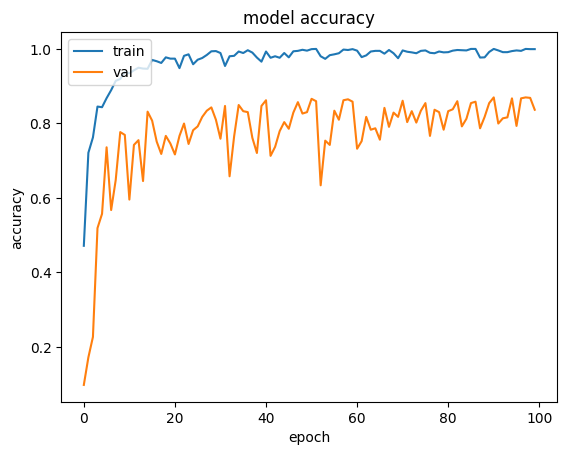

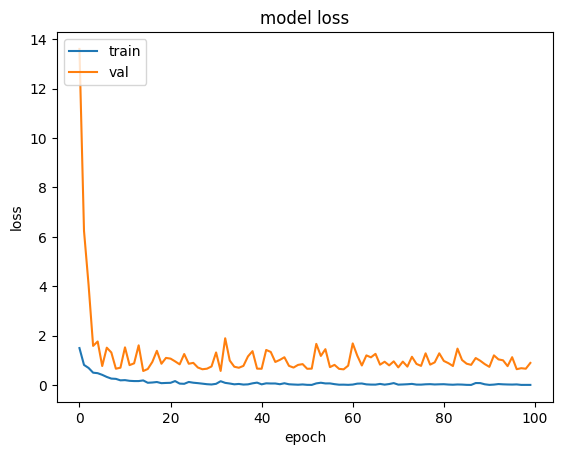

In [120]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 9ms/step
True Classes:  [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 8 8 8 8 8 4 4 4 4 4 4 5 5 5 5 5
 6 6 6 6 6 7 7 7 7 7 9 9 9 9 9]
Predicted Classes:  [0 0 0 0 0 1 1 2 2 1 2 2 0 2 2 2 3 3 2 3 2 8 8 3 8 8 1 4 0 4 4 4 1 5 5 5 5
 6 2 6 6 2 7 7 7 2 7 9 9 9 9 2]


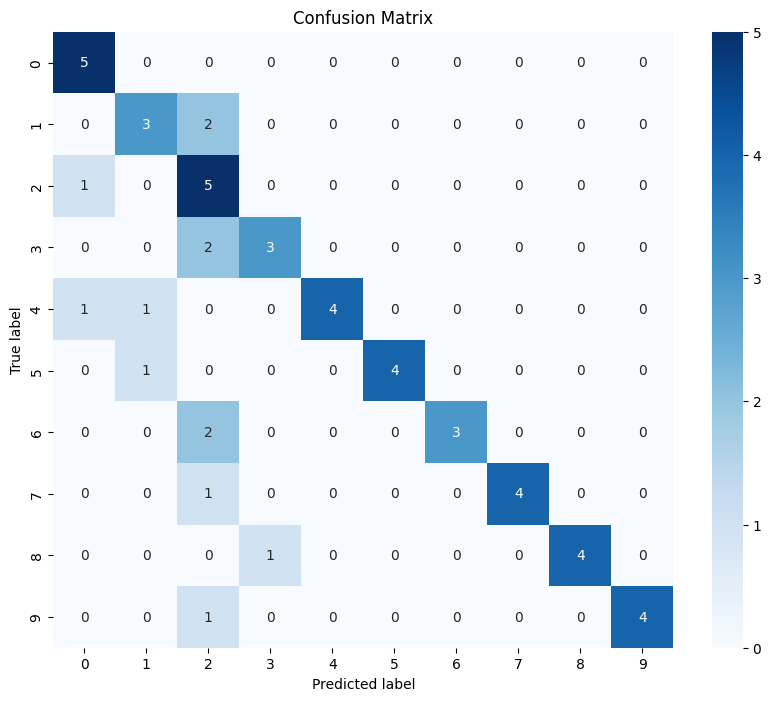

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Nhãn thực tế
true_classes = np.concatenate([y.numpy() for _, y in test])  # Gộp nhãn từ các batch
true_classes = np.argmax(true_classes, axis=1)

# Tính ma trận
cm = confusion_matrix(true_classes, predicted_classes)
# Hiển thị nhãn dự đoán và nhãn thực tế
print("True Classes: ", true_classes)
print("Predicted Classes: ", predicted_classes)
# Vẽ ma trận 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

### Processing Dashed Line (Dilation)

#### Process Dashed Line

In [46]:
import os
import cv2
import numpy as np

# Function to apply dilation on a given image and save it
def process_image(input_path, output_path):
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply binary thresholding
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Apply dilation
    kernel = np.ones((5, 5), np.uint8)
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
    
    # Invert the image back to original
    final_img = cv2.bitwise_not(dilated_img)
    
    # Save the processed image
    cv2.imwrite(output_path, final_img)

# Base directory for input and output
    
input_base_dir = 'Data-centric/data/dashed_line'  # Replace with actual path to the input folder
output_base_dir = 'Data-centric/data/processing_DashedLine'  # Replace with actual path to the output folder

# List subdirectories to process ('train' and 'val')
subdirs = ['train', 'val']

for subdir in subdirs:
    # Full path to the train/val directory
    input_subdir_path = os.path.join(input_base_dir, subdir)
    output_subdir_path = os.path.join(output_base_dir, subdir)
    
    # Create the output subdirectory if it doesn't exist
    if not os.path.exists(output_subdir_path):
        os.makedirs(output_subdir_path)
    
    # Iterate through each Roman numeral directory (i, ii, ..., x)
    for numeral_dir in os.listdir(input_subdir_path):
        input_numeral_path = os.path.join(input_subdir_path, numeral_dir)
        output_numeral_path = os.path.join(output_subdir_path, numeral_dir)
        
        # Check if it's a directory
        if os.path.isdir(input_numeral_path):
            # Create the numeral directory in output if it doesn't exist
            if not os.path.exists(output_numeral_path):
                os.makedirs(output_numeral_path)
            
            # Process each image in the numeral directory
            for image_file in os.listdir(input_numeral_path):
                if image_file.endswith('.png'):  # Process only PNG files
                    input_image_path = os.path.join(input_numeral_path, image_file)
                    output_image_path = os.path.join(output_numeral_path, image_file)
                    
                    # Process the image and save to the output path
                    process_image(input_image_path, output_image_path)

print("Processing complete!")


Processing complete!


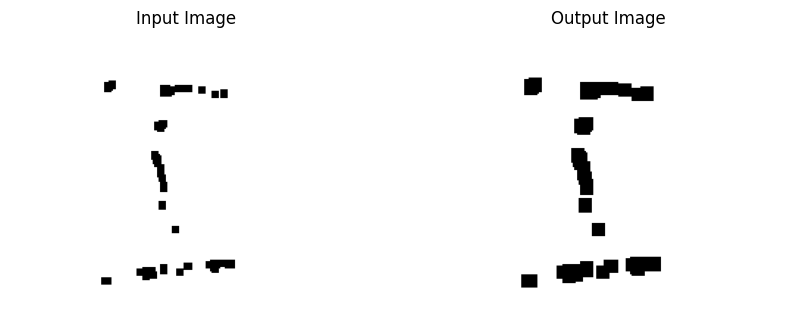

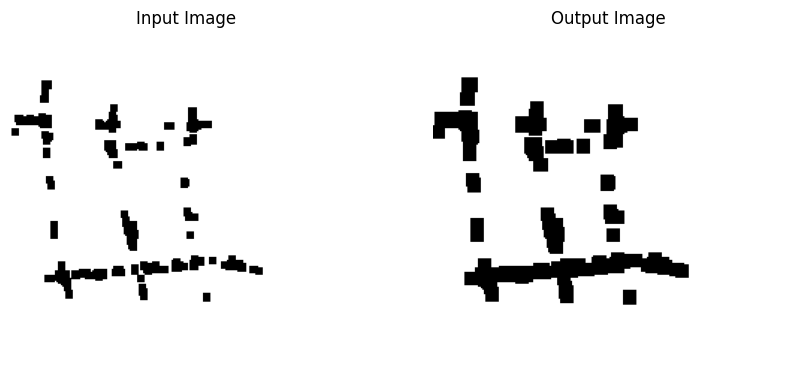

In [47]:
def visualize_images(input_image_path, output_image_path):
    # Read images
    input_img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
    output_img = cv2.imread(output_image_path, cv2.IMREAD_GRAYSCALE)
    
    # Plot input and output images side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(input_img, cmap='gray')
    axs[0].set_title('Input Image')
    axs[0].axis('off')
    
    axs[1].imshow(output_img, cmap='gray')
    axs[1].set_title('Output Image')
    axs[1].axis('off')
    
    plt.show()

# Visualize a few sample images from the processed directories
# Replace these with actual paths to your images
sample_images = [
    ('Data-centric/data/dashed_line/train/i/ac307620-ce5d-11eb-b317-38f9d35ea60f.png', 'Data-centric/data/processing_DashedLine/train/i/ac307620-ce5d-11eb-b317-38f9d35ea60f.png'),
    ('Data-centric/data/dashed_line/train/iii/b04541e6-ce5d-11eb-b317-38f9d35ea60f.png', 'Data-centric/data/processing_DashedLine/train/iii/b04541e6-ce5d-11eb-b317-38f9d35ea60f.png')
]

for input_image_path, output_image_path in sample_images:
    visualize_images(input_image_path, output_image_path)

### Update mislabeled 

In [127]:
# Define the source directories
source_mislabeled = "Data-centric/clean/mislabeled"
# source_processing_dashed_line = "Data-centric/data/processing_DashedLine"
destination_root = "Data-centric/clean"  # Assuming you want to copy to the current directory (root)

# Function to copy contents of a directory to a destination
def copy_contents(src, dest):
    # Check if the source directory exists
    if os.path.exists(src):
        for item in os.listdir(src):
            s = os.path.join(src, item)
            d = os.path.join(dest, item)
            # Copy the item to the destination
            if os.path.isdir(s):
                shutil.copytree(s, d, dirs_exist_ok=True)  # Copy subdirectory
            else:
                shutil.copy2(s, d)  # Copy file
        print(f"Copied contents from {src} to {dest}")
    else:
        print(f"{src} does not exist.")

# Copy contents of mislabeled and processing_DashedLine directories to root
copy_contents(source_mislabeled, destination_root)
# copy_contents(source_processing_dashed_line, destination_root)

Copied contents from Data-centric/clean/mislabeled to Data-centric/clean


In [128]:
TRAIN_DATA_UPDATE='Data-centric/clean/train'
VALID_DATA_UPDATE='Data-centric/clean/val'

In [129]:
train_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(TRAIN_DATA_UPDATE) for filename in filenames])
valid_img_count = len([os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(VALID_DATA_UPDATE) for filename in filenames])
# Print the total number of images in each set
print(f'Total number of train images: {train_img_count}')
print(f'Total number of validation images: {valid_img_count}')

Total number of train images: 1803
Total number of validation images: 798


In [132]:
# Count images in each set
train_counts = count_images_in_folders(TRAIN_DATA)
val_counts = count_images_in_folders(VALID_DATA)
train_counts, val_counts
# Combine all counts into a dataframe
df_counts = pd.DataFrame(train_counts + val_counts)

# Plot the data using plotly express
fig = px.bar(df_counts, x='label', y='count', color='type', barmode='group',
             title="Number of Images in Train, Validation, and Label Book Datasets",
             labels={'label': 'Roman Numerals', 'count': 'Number of Images'})
fig.show()

### Train with relabel

In [145]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys

directory = "Data-centric/"
user_data = directory + "clean"
valid_data = directory + "clean"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length >= 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_loss",
        mode="min",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 1803 files belonging to 10 classes.


Found 798 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_8  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_8 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_16 (Functional)       (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_8  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                          

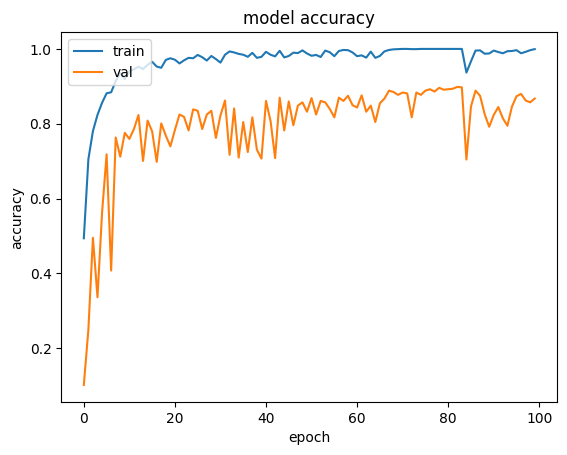

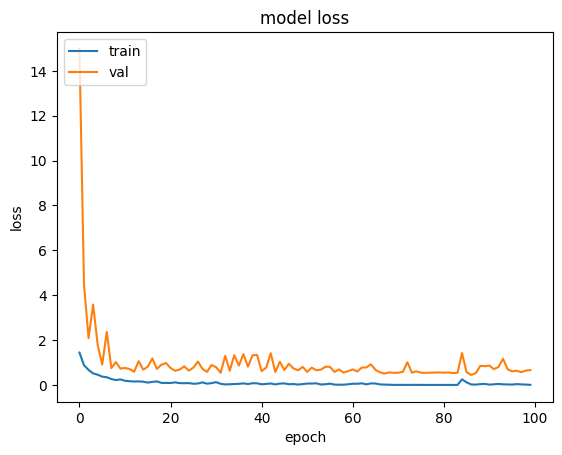

In [167]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Found 52 files belonging to 10 classes.


7/7 [==============================] - 1s 8ms/step - loss: 1.0240 - accuracy: 0.7885
Loaded model - loss: 1.0239750146865845, accuracy: 0.7884615659713745
7/7 [==============================] - 0s 6ms/step
True Classes: 
 [ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  9  9  9
  9  9  5  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8 10
 10 10 10 10]
Predicted Classes: 
 [ 1  1  1  1  1  2  2  3  3  2  3  3  1  3  3  3  4  4  4  4  4  9  9  4
  9  9  2  5  6  5  5  5  2  6  6  6  6  7  8  7  7  3  8  8  8  3  8 10
 10 10 10  3]


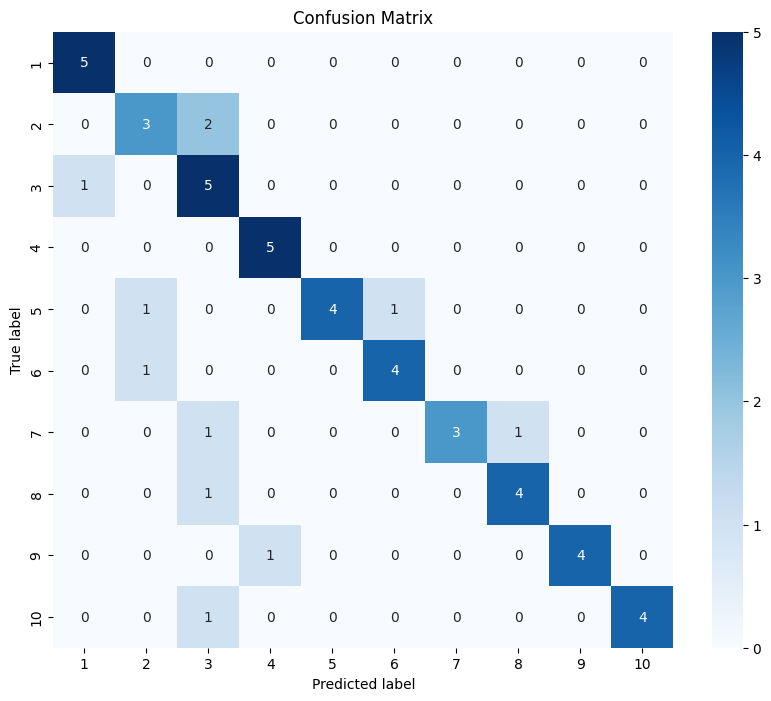

In [144]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

directory = "Data-centric/"
test_data = directory + "label_book"                # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )
    # Define the model architecture (must match the architecture when saving weights)
    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    # Compile the model (this step is required before loading weights)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    # Load the weights from the checkpoint
    model.load_weights("Weight/mislabel_unrelated/best_model")                    ######################### THAY ĐƯỜNG DẪN CHECK WEIGHT

    # Now the model is ready to use, you can evaluate or predict using this model
    loss, acc = model.evaluate(test)  # Assuming `valid` is your validation dataset
    print(f"Loaded model - loss: {loss}, accuracy: {acc}")
    # Dự đoán
    predictions = model.predict(test)
    predicted_classes = np.argmax(predictions, axis=1)

    # Nhãn thực tế
    true_classes = np.concatenate([y.numpy() for _, y in test])  # Gộp nhãn từ các batch
    true_classes = np.argmax(true_classes, axis=1)

    # Tăng nhãn lên 1 để bắt đầu từ 1
    true_classes += 1
    predicted_classes += 1

    # Tính ma trận
    cm = confusion_matrix(true_classes, predicted_classes)

    # Hiển thị nhãn dự đoán và nhãn thực tế
    print("True Classes: \n", true_classes)
    print("Predicted Classes: \n", predicted_classes)

    # Vẽ ma trận 
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, cm.shape[1]+1), yticklabels=np.arange(1, cm.shape[0]+1))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

### Show image

In [152]:

def show_images(label, num):
    images, labels, filenames = [], [], []

    # Add train data images
    data_folders = [TRAIN_DATA_UPDATE, VALID_DATA_UPDATE]
    
    for data_folder in data_folders:
        for folder in os.listdir(data_folder):
              for image in os.listdir(data_folder + '/' + label):
                images.append(os.path.join(data_folder, label, image))
                filenames.append(f'{image}')

    plt.figure(1, figsize=(18, 11))
    plt.axis('off')
    
    n = 0
    for i in range(num):
        n += 1
        random_index = random.choice(range(len(images)))
        random_filename = filenames[random_index]
        random_img = images[random_index]
        img = cv2.imread(random_img, cv2.IMREAD_GRAYSCALE)
        plt.subplot(int(np.sqrt(num)), int(np.sqrt(num)), n)
        plt.axis('off')
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        random_data_type = random_filename.split('/')[0]
        random_img_name = random_filename.split('/')[-1].split('.')[0]
        plt.title(f'{random_img_name}')

    plt.show()

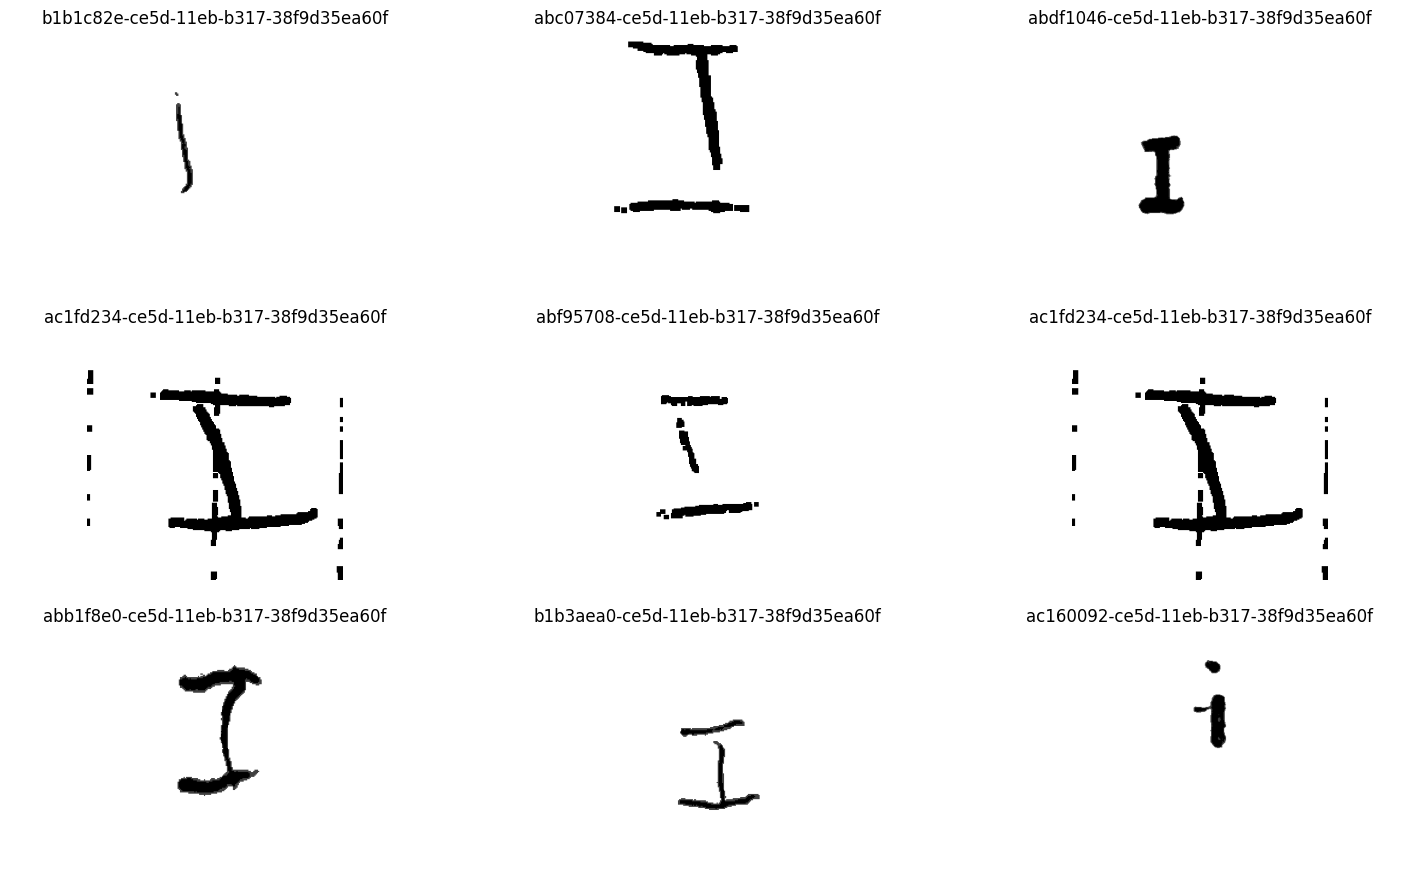

In [153]:
show_images('i', 9)

# Augment

## Show image transform and 4 method transform

In [66]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2

# Function to get 1 random image (from training set) and compare with transformed image
def show_single_transform(transform, show_histogram=False):
    images, filenames = [], []
    
    for folder in os.listdir(TRAIN_DATA_CLEAN):
        for image in os.listdir(os.path.join(TRAIN_DATA_CLEAN, folder)):
            images.append(os.path.join(TRAIN_DATA_CLEAN, folder, image))
            filenames.append(f'{image}')
    
    random_index = random.choice(range(len(images)))
    random_filename = filenames[random_index]
    random_img = images[random_index]
    
    img_original = Image.open(random_img)
    img_original = ImageOps.grayscale(img_original)  # Convert to grayscale

    # Execute transformation
    try:
        img_transformed = transform(img_original)
    except Exception as e:
        print(f"Error during transformation: {e}")
        img_transformed = transform(images=np.asarray(img_original))

    print('Transformation successful')

    # Convert transformed image back to PIL for displaying
    if isinstance(img_transformed, np.ndarray):
        img_transformed = Image.fromarray(np.uint8(img_transformed))

    # Display images side by side
    fig = plt.figure(figsize=(14, 8))

    # Show original image
    fig.add_subplot(221)
    plt.title('Original Image')
    plt.axis('off')
    plt.imshow(img_original, cmap='gray')

    # Show transformed image
    fig.add_subplot(222)
    plt.title('Transformed Image')
    plt.axis('off')
    plt.imshow(img_transformed, cmap='gray')
    
    if show_histogram:
        hist_original = cv2.calcHist([np.asarray(img_original)], [0], None, [256], [0, 256])
        hist_transformed = cv2.calcHist([np.asarray(img_transformed)], [0], None, [256], [0, 256])
        
        fig.add_subplot(223)
        plt.title('Histogram of Original')
        plt.plot(hist_original)
        fig.add_subplot(224)
        plt.title('Histogram of Transformed')
        plt.plot(hist_transformed)
    
    plt.show()


In [67]:
# No flip: iv, vi, vii, viii
transform_v5a = iaa.Sequential([
                    iaa.Resize({"height": 400, "width": 400}),
                    iaa.Crop(percent=(0, 0.05)),
                    iaa.Sometimes(
                        0.5,
                        iaa.GaussianBlur(sigma=(0, 0.5))
                    ),
                    iaa.LinearContrast((1.35, 1.75)), 
                    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
                    iaa.Multiply((0.8, 1.2), per_channel=0.2),
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
                        rotate=(-20, 20),
                        shear=(-3, 3),
                        cval=255
                    )
                ], random_order=False) # Cancel random order


# Horizontal flip only: v
transform_v5b = iaa.Sequential([
                    iaa.Fliplr(0.5), # Horizontal flip
                    iaa.Resize({"height": 400, "width": 400}),
                    iaa.Crop(percent=(0, 0.05)),
                    iaa.Sometimes(
                        0.5,
                        iaa.GaussianBlur(sigma=(0, 0.5))
                    ),
                    iaa.LinearContrast((1.35, 1.75)), 
                    iaa.AdditiveGaussianNoise(loc=0, 
                                              scale=(0.0, 0.05*255), 
                                              per_channel=0.5),
                    iaa.Multiply((0.8, 1.2), per_channel=0.2),
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
                        rotate=(-20, 20),
                        shear=(-3, 3),
                        cval=255 # Fill with white pixels
                    )
                ], random_order=False)


# Vertical flip only: ix
transform_v5c = iaa.Sequential([
                    iaa.Flipud(0.5), # Vertical flip
                    iaa.Resize({"height": 400, "width": 400}),
                    iaa.Crop(percent=(0, 0.05)),
                    iaa.Sometimes(
                        0.5,
                        iaa.GaussianBlur(sigma=(0, 0.5))
                    ),
                    iaa.LinearContrast((1.35, 1.75)), 
                    iaa.AdditiveGaussianNoise(loc=0, 
                                              scale=(0.0, 0.05*255), 
                                              per_channel=0.5),
                    iaa.Multiply((0.8, 1.2), per_channel=0.2),
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
                        rotate=(-20, 20),
                        shear=(-3, 3),
                        cval=255
                    )
                ], random_order=False)


# Horizontal AND Vertical flip only: i, ii, iii, x
transform_v5d = iaa.Sequential([
                    iaa.Flipud(0.5), # Vertical flip
                    iaa.Fliplr(0.5), # Horizontal flip 
                    iaa.Resize({"height": 400, "width": 400}),
                    iaa.Crop(percent=(0, 0.05)),
                    iaa.Sometimes(
                        0.5,
                        iaa.GaussianBlur(sigma=(0, 0.5))
                    ),
                    iaa.LinearContrast((1.35, 1.75)), 
                    iaa.AdditiveGaussianNoise(loc=0, 
                                              scale=(0.0, 0.05*255), 
                                              per_channel=0.5),
                    iaa.Multiply((0.8, 1.2), per_channel=0.2),
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
                        rotate=(-20, 20),
                        shear=(-3, 3),
                        cval=255
                    )
                ], random_order=False)

### Crop and squar (test)

In [14]:
import cv2
import numpy as np
from PIL import Image
import imgaug.augmenters as iaa

def crop_and_square_image(image, padding=0.01):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    nb_rows, nb_cols = gray_image.shape

    non_empty_columns = np.where(gray_image.min(axis=0) < 255)[0]
    non_empty_rows = np.where(gray_image.min(axis=1) < 255)[0]

    cropBox = (int(min(non_empty_rows) * (1 - padding)),
               int(min(max(non_empty_rows) * (1 + padding), nb_rows)),
               int(min(non_empty_columns) * (1 - padding)),
               int(min(max(non_empty_columns) * (1 + padding), nb_cols)))

    cropped_image = image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1, :]

    max_dimension = max(cropped_image.shape)
    extra_height = (max_dimension - cropped_image.shape[0]) // 2
    extra_width = (max_dimension - cropped_image.shape[1]) // 2

    cropped_and_squared_image_data = cv2.copyMakeBorder(cropped_image, extra_height, extra_height, extra_width, extra_width, cv2.BORDER_CONSTANT, value=(255, 255, 255))

    return Image.fromarray(cropped_and_squared_image_data)

# No flip: iv, vi, vii, viii
transform_v5a = iaa.Sequential([
    iaa.Lambda(crop_and_square_image),  # Sử dụng hàm crop ở đây
    iaa.Resize({"height": 400, "width": 400}),
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.LinearContrast((1.35, 1.75)), 
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
        rotate=(-20, 20),
        shear=(-3, 3),
        cval=255
    )
], random_order=False)

# Horizontal flip only: v
transform_v5b = iaa.Sequential([
    iaa.Lambda(crop_and_square_image),  # Sử dụng hàm crop ở đây
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Resize({"height": 400, "width": 400}),
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.LinearContrast((1.35, 1.75)), 
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
        rotate=(-20, 20),
        shear=(-3, 3),
        cval=255
    )
], random_order=False)

# Vertical flip only: ix
transform_v5c = iaa.Sequential([
    iaa.Lambda(crop_and_square_image),  # Sử dụng hàm crop ở đây
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Resize({"height": 400, "width": 400}),
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.LinearContrast((1.35, 1.75)), 
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
        rotate=(-20, 20),
        shear=(-3, 3),
        cval=255
    )
], random_order=False)

# Horizontal AND Vertical flip only: i, ii, iii, x
transform_v5d = iaa.Sequential([
    iaa.Lambda(crop_and_square_image),  # Sử dụng hàm crop ở đây
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Fliplr(0.5),  # Horizontal flip 
    iaa.Resize({"height": 400, "width": 400}),
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.LinearContrast((1.35, 1.75)), 
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.06, 0.06), "y": (-0.06, 0.06)},
        rotate=(-20, 20),
        shear=(-3, 3),
        cval=255
    )
], random_order=False)


In [15]:
show_single_transform(transform_v5a, show_histogram=True)


Error during transformation: Expected boolean as argument for 'return_batch', got type <class 'PIL.Image.Image'>. Call augment() only with named arguments, e.g. augment(images=<array>).


TypeError: crop_and_square_image() takes from 1 to 2 positional arguments but 4 were given

## Augment 7/3

### Size 400

In [43]:
TRAIN_DATA_CLEAN

'Data-centric/clean/train'

In [1]:
# Mixing train and valid sets together first, perform augmentation, and then splitting
def augment_images_shuffle(label, transform, aug_version, 
                           total_size=1000, train_size=700,
                           extra_transform=None):
    # Setup relevant folder paths    
    input_folder_train = f'{TRAIN_DATA_CLEAN}/{label}'
    input_folder_valid = f'{TRAIN_DATA_CLEAN}/{label}'
    
    # Create temporary folder for input images specific label (with all train and val images)
    temp_folder = f'augmented_{aug_version}/temp_{label}'
    
    Path(temp_folder).mkdir(parents=True, exist_ok=True)
   
    # Copy all clean images into temp folder
    input_folders = [input_folder_train, input_folder_valid]
    
    for input_folder in input_folders:
        for image in os.listdir(input_folder):
            # Copy the contents of source to destination 
            dataset_type = input_folder.split('/')[-2] # Train or valid set
            shutil.copy(f'{input_folder}/{image}', temp_folder)

    # Create output folder paths
    output_folder_train = f'Data-centric/clean/augmented_{aug_version}/train/{label}'
    output_folder_val = f'Data-centric/clean/augmented_{aug_version}/val/{label}'
    Path(output_folder_train).mkdir(parents=True, exist_ok=True)
    Path(output_folder_val).mkdir(parents=True, exist_ok=True)
        
    input_files = glob(os.path.join(temp_folder, "*.png"))
    print(f'Created temp folder: {temp_folder}')
    
    # For every image, do random transformations until hit the 1000 image mark (for each label)
    temp_folder_count = len(os.listdir(temp_folder))
    
    # Calculate number of additional images to generate to top up to 1000 images
    balance_count = total_size - temp_folder_count

    n = 0
    for i in range(balance_count):
        n += 1
        random_index = random.choice(range(len(input_files)))
        random_file = input_files[random_index]
        img_random = Image.open(random_file)
        img_random = ImageOps.grayscale(img_random)

        # Execute transformation (IAA)
        try:
            transformed_img_random = transform(img_random)
        except:
            transformed_img_random = transform(images=np.asarray(img_random))   
            
        # Perform additional morphological operation (e.g. CV2 morphs)
        if extra_transform is not None:
            transformed_img_random = extra_transform(transformed_img_random)
        
        # Convert back to PIL to save
        transformed_img_random = Image.fromarray(transformed_img_random)       
        transformed_img_random.save(f'{temp_folder}/{label}_random_{n}.png', 'PNG')
        
    # Random assign images into train and validation folders (for each label) for final split
    full_img_list = [file for file in os.listdir(temp_folder)]
    print(len(full_img_list))
    train_list = random.sample(full_img_list, train_size)
    val_list = [x for x in full_img_list if x not in train_list]

    for file in train_list:
        shutil.copy(os.path.join(temp_folder, file), output_folder_train)
    for file in val_list:
        shutil.copy(os.path.join(temp_folder, file), output_folder_val)
    
    # Delete temporary folder
    shutil.rmtree(temp_folder, ignore_errors=True)

In [7]:
# Set labels for specific augmentations
target_labels = ['i','ii','iii','iv','v','vi','vii','viii','ix','x'] # List of all labels

labels_no_flip = ['iv','vi','vii','viii'] # No flipping
labels_h_flip = ['v'] # Horizontal flip
labels_v_flip = ['ix'] # Vertical flip
labels_h_and_v_flip = ['i','ii','iii','x'] # Both horizontal and vertical flips

for target_label in target_labels:
    if target_label in labels_no_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5a, # Indicate type of augmentation sequence
                                aug_version='7_3_combin', # Specify version number of experiment
                                train_size=280) # Creating a 80/20 train/val split
        
    elif target_label in labels_h_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5b, 
                                aug_version='7_3_combin',
                                train_size=280)
        
    elif target_label in labels_v_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5c, 
                                aug_version='7_3_combin',
                                train_size=280)
        
    else:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5d, 
                                aug_version='7_3_combin',
                                train_size=280)

Created temp folder: augmented_7_3_combin/temp_i
400
Created temp folder: augmented_7_3_combin/temp_ii
400
Created temp folder: augmented_7_3_combin/temp_iii
400
Created temp folder: augmented_7_3_combin/temp_iv
400
Created temp folder: augmented_7_3_combin/temp_v
400
Created temp folder: augmented_7_3_combin/temp_vi
400
Created temp folder: augmented_7_3_combin/temp_vii
400
Created temp folder: augmented_7_3_combin/temp_viii
400
Created temp folder: augmented_7_3_combin/temp_ix
400
Created temp folder: augmented_7_3_combin/temp_x
400


In [45]:
# Set labels for specific augmentations
target_labels = ['i','ii','iii','iv','v','vi','vii','viii','ix','x'] # List of all labels

labels_no_flip = ['iv','vi','vii','viii'] # No flipping
labels_h_flip = ['v'] # Horizontal flip
labels_v_flip = ['ix'] # Vertical flip
labels_h_and_v_flip = ['i','ii','iii','x'] # Both horizontal and vertical flips

for target_label in target_labels:
    if target_label in labels_no_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5a, # Indicate type of augmentation sequence
                                aug_version='8_2', # Specify version number of experiment
                                train_size=800) # Creating a 80/20 train/val split
        
    elif target_label in labels_h_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5b, 
                                aug_version='8_2',
                                train_size=800)
        
    elif target_label in labels_v_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5c, 
                                aug_version='8_2',
                                train_size=800)
        
    else:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5d, 
                                aug_version='8_2',
                                train_size=800)

Created temp folder: augmented_8_2/temp_i
1000
Created temp folder: augmented_8_2/temp_ii
1000
Created temp folder: augmented_8_2/temp_iii
1000
Created temp folder: augmented_8_2/temp_iv
1000
Created temp folder: augmented_8_2/temp_v
1000
Created temp folder: augmented_8_2/temp_vi
1000
Created temp folder: augmented_8_2/temp_vii
1000
Created temp folder: augmented_8_2/temp_viii
1000
Created temp folder: augmented_8_2/temp_ix
1000
Created temp folder: augmented_8_2/temp_x
1000


## Train with augment 7/3

In [159]:
### Code early stopping
# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_loss',        # Theo dõi val_loss
#     patience=10,                # Dừng sau 5 epoch không cải thiện
#     restore_best_weights=True   # Khôi phục trọng số tốt nhất
# )

In [3]:
directory = "Data-centric/"
user_data = directory + "clean/augmented_7_3"
valid_data = directory + "clean/augmented_7_3"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",  
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length > 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "73/best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("73/best_model")
    
    loss, acc = model.evaluate(train)
    print(f"final loss {loss}, final acc {acc}")

    loss1, acc1 = model.evaluate(valid)
    print(f"final loss {loss1}, final acc {acc1}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 7000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_1  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_2 (Functional)        (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_1  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                           

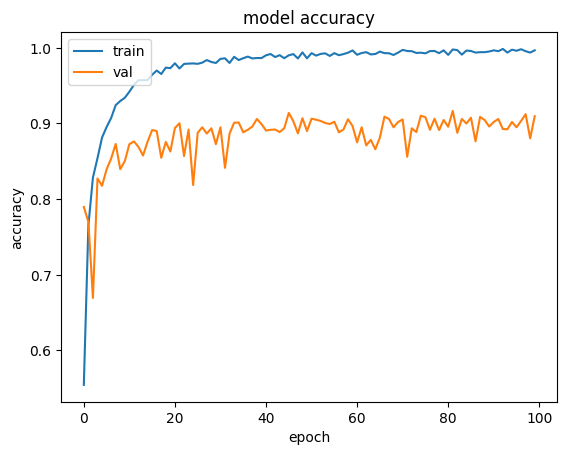

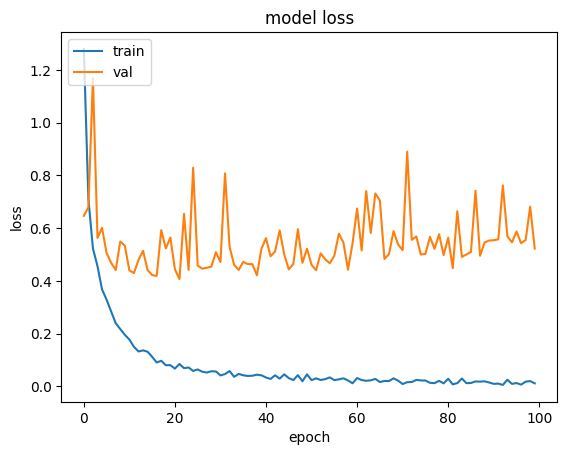

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Augment 8/2

## Train with  augment 8/2

In [4]:
directory = "Data-centric/"
user_data = directory + "clean/augmented_8_2"
valid_data = directory + "clean/augmented_8_2"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length > 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 8000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_1  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_2 (Functional)        (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_1  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                           

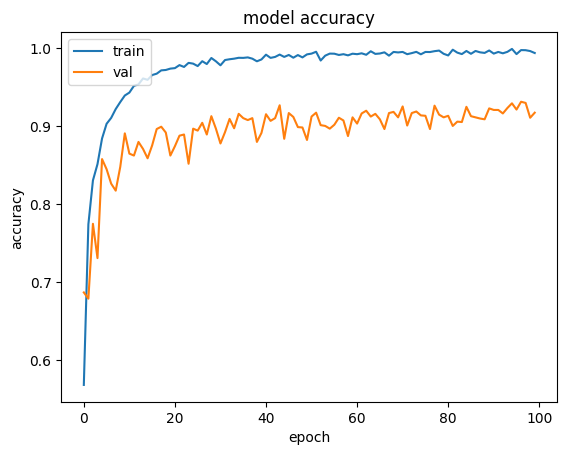

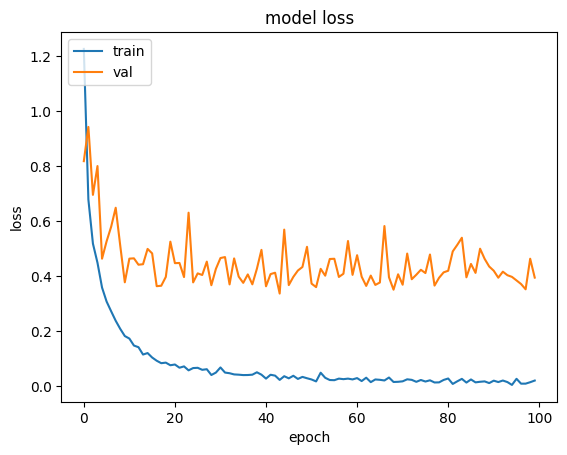

In [5]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 7ms/step
True Classes:  [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 8 8 8 8 8 4 4 4 4 4 4 5 5 5 5 5
 6 6 6 6 6 7 7 7 7 7 9 9 9 9 9]
Predicted Classes:  [0 0 0 0 0 1 1 2 1 1 2 2 1 2 2 2 3 3 2 3 3 8 8 3 8 8 4 4 0 4 4 4 1 5 5 5 5
 6 6 6 6 2 7 7 7 2 7 9 9 9 9 9]


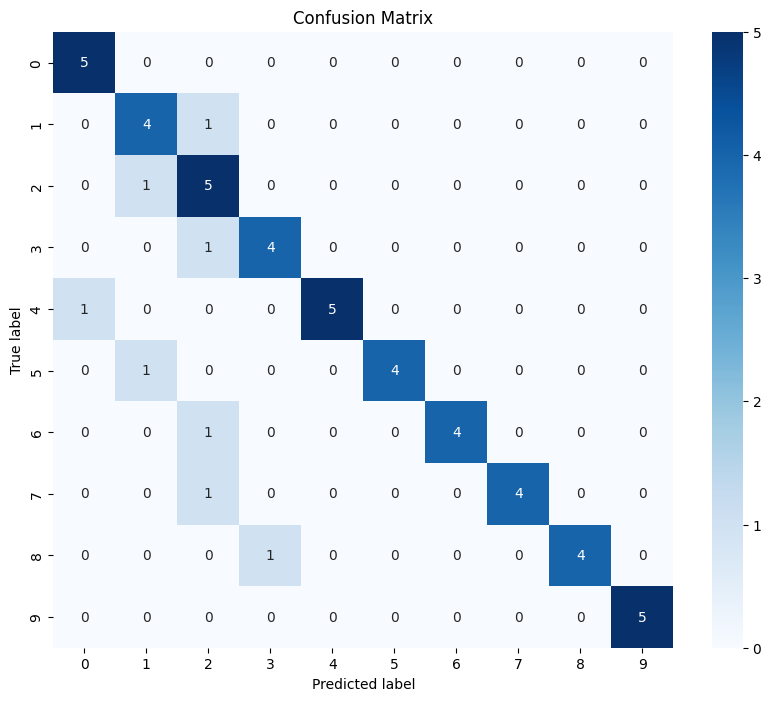

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Nhãn thực tế
true_classes = np.concatenate([y.numpy() for _, y in test])  # Gộp nhãn từ các batch
true_classes = np.argmax(true_classes, axis=1)

# Tính ma trận
cm = confusion_matrix(true_classes, predicted_classes)
# Hiển thị nhãn dự đoán và nhãn thực tế
print("True Classes: ", true_classes)
print("Predicted Classes: ", predicted_classes)
# Vẽ ma trận 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [9]:
predicted_classes

array([0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 8,
       8, 3, 8, 8, 4, 4, 0, 4, 4, 4, 1, 5, 5, 5, 5, 6, 6, 6, 6, 2, 7, 7,
       7, 2, 7, 9, 9, 9, 9, 9], dtype=int64)

# Test kmean,pca

## CNN

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

train_dir = 'Data-centric/data/train'
val_dir = 'Data-centric/data/val'

# Chuẩn bị ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Tạo generator cho tập train
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Tạo generator cho tập validation
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Định nghĩa mạng CNN đơn giản
def create_cnn(input_shape=(224, 224, 3)):
    model = Sequential()

    # Lớp chập đầu tiên
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Lớp chập thứ hai
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Lớp chập thứ ba
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Sử dụng GlobalAveragePooling để thay thế Flatten
    model.add(GlobalAveragePooling2D())
    
    return model

# Tạo mạng CNN
cnn_model = create_cnn()
cnn_model.summary()

# Hàm trích xuất đặc trưng
def extract_features(generator, model, sample_count):
    features = model.predict(generator, steps=np.ceil(sample_count / generator.batch_size))
    return features

# Trích xuất đặc trưng
train_samples = train_generator.samples
val_samples = val_generator.samples

print("Trích xuất đặc trưng từ tập train với CNN...")
train_features = extract_features(train_generator, cnn_model, train_samples)
print("Trích xuất đặc trưng từ tập validation với CNN...")
val_features = extract_features(val_generator, cnn_model, val_samples)

# Lấy nhãn từ generator
train_labels = train_generator.classes
val_labels = val_generator.classes

# Giảm chiều dữ liệu bằng PCA cho K-means
pca = PCA(n_components=100, random_state=42)
train_features_pca = pca.fit_transform(train_features)

# Áp dụng K-means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(train_features_pca)
train_clusters = kmeans.predict(train_features_pca)

# Giảm chiều xuống 2D để trực quan hóa
pca_2d = PCA(n_components=2, random_state=42)
train_features_2d = pca_2d.fit_transform(train_features)

# Tạo DataFrame cho Dash
label_mapping = {v: k for k, v in train_generator.class_indices.items()}
df = pd.DataFrame({
    'PCA1': train_features_2d[:, 0],
    'PCA2': train_features_2d[:, 1],
    'Cluster': train_clusters,
    'Label': train_labels
})
df['Label'] = df['Label'].map(label_mapping)
df['Image_Path'] = train_generator.filepaths  # Đường dẫn đến ảnh gốc


## Resnet

In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

train_dir = 'Data-centric/clean/Combined Handwritten Roman Numerals Dataset/new_train'
val_dir = 'Data-centric/clean/Combined Handwritten Roman Numerals Dataset/new_val'

# Chuẩn bị ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Tạo generator cho tập train
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Tạo generator cho tập validation
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Tải ResNet50 và loại bỏ lớp đầu ra
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
base_model.summary()

# Hàm trích xuất đặc trưng
def extract_features(generator, model, sample_count):
    features = model.predict(generator, steps=np.ceil(sample_count / generator.batch_size))
    return features

# Trích xuất đặc trưng
train_samples = train_generator.samples
val_samples = val_generator.samples

print("Trích xuất đặc trưng từ tập train...")
train_features = extract_features(train_generator, base_model, train_samples)
print("Trích xuất đặc trưng từ tập validation...")
val_features = extract_features(val_generator, base_model, val_samples)

# Lấy nhãn từ generator
train_labels = train_generator.classes
val_labels = val_generator.classes

# Giảm chiều dữ liệu bằng PCA cho K-means
pca = PCA(n_components=100, random_state=42)
train_features_pca = pca.fit_transform(train_features)

# Áp dụng K-means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(train_features_pca)
train_clusters = kmeans.predict(train_features_pca)

# Giảm chiều xuống 2D để trực quan hóa
pca_2d = PCA(n_components=2, random_state=42)
train_features_2d = pca_2d.fit_transform(train_features)

# Tạo DataFrame cho Dash
label_mapping = {v: k for k, v in train_generator.class_indices.items()}
df = pd.DataFrame({
    'PCA1': train_features_2d[:, 0],
    'PCA2': train_features_2d[:, 1],
    'Cluster': train_clusters,
    'Label': train_labels
})
df['Label'] = df['Label'].map(label_mapping)
df['Image_Path'] = train_generator.filepaths  # Đường dẫn đến ảnh gốc

Found 2067 images belonging to 10 classes.
Found 813 images belonging to 10 classes.
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)  

In [3]:
df

,PCA1,PCA2,Cluster,Label,Image_Path
0,-3.160842,-1.243361,1,i,Data-centric/data/train\i\ab9fb784-ce5d-11eb-b...
1,-1.935993,-2.717362,8,i,Data-centric/data/train\i\aba24486-ce5d-11eb-b...
2,-1.362945,-2.107711,8,i,Data-centric/data/train\i\aba35128-ce5d-11eb-b...
3,-2.322812,-1.933780,1,i,Data-centric/data/train\i\aba4001e-ce5d-11eb-b...
4,-2.906060,-2.018326,1,i,Data-centric/data/train\i\aba4a622-ce5d-11eb-b...
...,...,...,...,...,...
2062,-1.036790,1.383117,4,x,Data-centric/data/train\x\b02616ea-ce5d-11eb-b...
2063,0.238295,7.187516,9,x,Data-centric/data/train\x\b0269fa2-ce5d-11eb-b...
2064,-2.161605,3.795008,3,x,Data-centric/data/train\x\b0276dc4-ce5d-11eb-b...
2065,-2.333886,-1.032633,1,x,Data-centric/data/train\x\b0283a38-ce5d-11eb-b...


In [135]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

train_dir = 'Data-centric/clean/train'
val_dir = 'Data-centric/clean/val'

# Chuẩn bị ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Tạo generator cho tập train
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Tạo generator cho tập validation
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Tải ResNet50 và loại bỏ lớp đầu ra
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
base_model.summary()

# Hàm trích xuất đặc trưng
def extract_features(generator, model, sample_count):
    features = model.predict(generator, steps=np.ceil(sample_count / generator.batch_size))
    return features

# Trích xuất đặc trưng
train_samples = train_generator.samples
val_samples = val_generator.samples

print("Trích xuất đặc trưng từ tập train...")
train_features = extract_features(train_generator, base_model, train_samples)
print("Trích xuất đặc trưng từ tập validation...")
val_features = extract_features(val_generator, base_model, val_samples)

# Lấy nhãn từ generator
train_labels = train_generator.classes
val_labels = val_generator.classes

# Giảm chiều dữ liệu bằng PCA cho K-means
pca = PCA(n_components=0.95, random_state=42)
train_features_pca = pca.fit_transform(train_features)

# Áp dụng K-means
n_clusters = 10  # Bạn có thể điều chỉnh số cụm này nếu cần
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(train_features_pca)
train_clusters = kmeans.predict(train_features_pca)


Found 1803 images belonging to 10 classes.
Found 798 images belonging to 10 classes.


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_15[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [136]:
# Đánh giá các cụm
silhouette_avg = silhouette_score(train_features_pca, train_clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Phân loại theo nhóm (đúng label, sai label, không liên quan)
def classify_clusters(cluster_labels, true_labels, n_clusters):
    cluster_to_label = {}
    
    for cluster in range(n_clusters):
        indices = np.where(cluster_labels == cluster)[0]
        if len(indices) == 0:
            continue
        
        # Nhãn chiếm ưu thế trong cụm
        true_labels_in_cluster = true_labels[indices]
        unique, counts = np.unique(true_labels_in_cluster, return_counts=True)
        predominant_label = unique[np.argmax(counts)]
        
        # Lưu nhãn chiếm ưu thế cho cụm
        cluster_to_label[cluster] = predominant_label

    return cluster_to_label

# Lấy nhãn cho các cụm
cluster_label_mapping = classify_clusters(train_clusters, train_labels, n_clusters)

# Tạo DataFrame cho Dash
label_mapping = {v: k for k, v in train_generator.class_indices.items()}
df = pd.DataFrame({
    'Cluster': train_clusters,
    'Predominant_Label': [cluster_label_mapping[cluster] for cluster in train_clusters],
    'True_Label': train_labels
})
df['True_Label'] = df['True_Label'].map(label_mapping)
df['Image_Path'] = train_generator.filepaths  # Đường dẫn đến ảnh gốc

# Xác định nhóm (đúng label, sai label, không liên quan)
def categorize_images(row):
    if row['Predominant_Label'] == row['True_Label']:
        return 'Correct Label'
    elif row['Predominant_Label'] in cluster_label_mapping.values():
        return 'Incorrect Label'
    else:
        return 'Unrelated'

df['Category'] = df.apply(categorize_images, axis=1)
# Thêm các cột PCA vào DataFrame
df['PCA1'] = train_features_pca[:, 0]
df['PCA2'] = train_features_pca[:, 1]
# Xuất DataFrame để kiểm tra
df.head()

Silhouette Score: 0.133


,Cluster,Predominant_Label,True_Label,Image_Path,Category,PCA1,PCA2
0,6,0,i,Data-centric/clean/train\i\ab9fb784-ce5d-11eb-...,Incorrect Label,-3.238305,-1.357841
1,9,0,i,Data-centric/clean/train\i\aba24486-ce5d-11eb-...,Incorrect Label,-2.121987,-2.843127
2,9,0,i,Data-centric/clean/train\i\aba35128-ce5d-11eb-...,Incorrect Label,-1.487575,-2.163846
3,6,0,i,Data-centric/clean/train\i\aba4001e-ce5d-11eb-...,Incorrect Label,-2.383069,-2.012538
4,6,0,i,Data-centric/clean/train\i\aba4a622-ce5d-11eb-...,Incorrect Label,-2.871309,-2.077781


In [137]:
df['Category'].unique()

array(['Incorrect Label'], dtype=object)

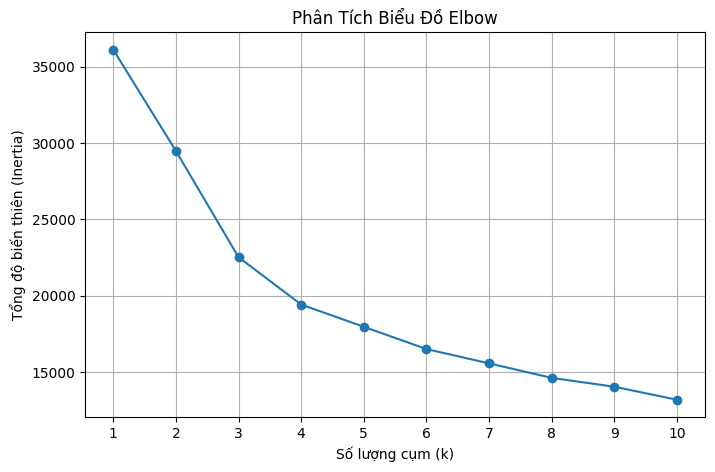

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Giả sử bạn đã trích xuất các đặc trưng và lưu vào train_features
# Chúng ta sẽ sử dụng PCA để giảm chiều nếu cần
pca = PCA(n_components=10)  # Có thể chọn số lượng chiều khác
features_pca = pca.fit_transform(train_features)

# Khởi tạo danh sách để lưu trữ giá trị inertia
inertia_values = []

# Thử nghiệm với số cụm từ 1 đến 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia_values.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Phân Tích Biểu Đồ Elbow')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Tổng độ biến thiên (Inertia)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [128]:
import plotly.express as px

# Trực quan hóa kết quả clustering
fig = px.scatter(
    df,
    x='PCA1',  # Trục x từ PCA
    y='PCA2',  # Trục y từ PCA
    color='Category',  # Màu sắc dựa trên danh mục
    title='K-means Clustering of Handwritten Roman Numerals',
    hover_data=['True_Label', 'Predominant_Label', 'Image_Path'],  # Hiển thị thêm thông tin khi di chuột
    color_discrete_sequence=['blue', 'orange', 'green'],  # Màu cho từng danh mục
)

# Cập nhật layout
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='Categories',
)

# Hiển thị biểu đồ
fig.show()


# add dữ liệu ngoài

In [29]:
directory = "Data-centric/"
user_data = directory + "clean/Combined Handwritten Roman Numerals Dataset"
valid_data = directory + "clean/Combined Handwritten Roman Numerals Dataset"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",  
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length > 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 7343 files belonging to 10 classes.
Found 2501 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_2  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_4 (Functional)        (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_2  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                           

In [1]:
# Lấy giá trị val_loss từ history
val_loss = history.history['val_loss']  # Danh sách các giá trị val_loss
min_val_loss = min(val_loss)             # Tìm giá trị min
min_val_loss_epoch = val_loss.index(min_val_loss) + 1  # Epoch (tính từ 1)

print(f"Maximum val_accuracy: {min_val_loss} at epoch: {min_val_loss_epoch}")

NameError: name 'history' is not defined

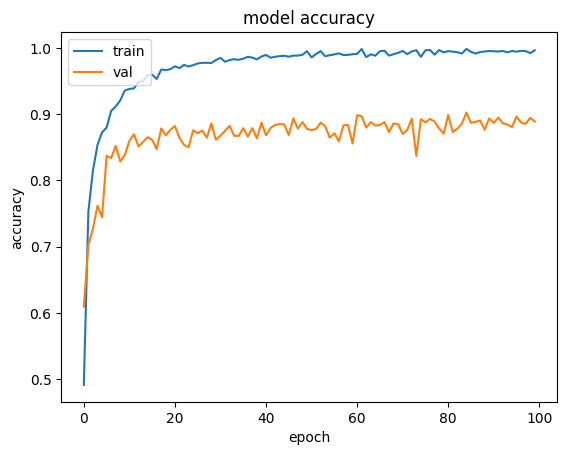

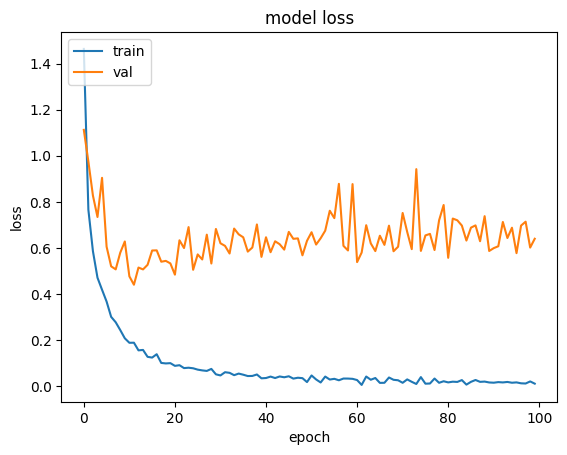

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 11ms/step
True Classes:  [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 8 8 8 8 8 4 4 4 4 4 4 5 5 5 5 5
 6 6 6 6 6 7 7 7 7 7 9 9 9 9 9]
Predicted Classes:  [0 0 0 0 0 1 1 2 1 1 2 2 0 1 2 1 3 3 3 3 3 8 8 3 8 8 4 4 0 4 4 4 5 5 5 5 5
 6 7 6 6 6 7 7 7 7 7 9 9 9 9 9]


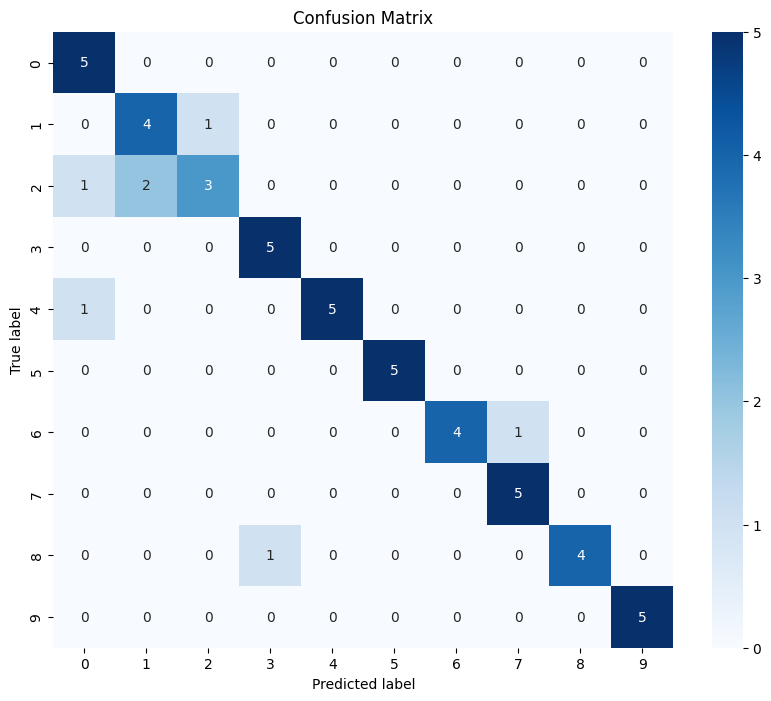

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Nhãn thực tế
true_classes = np.concatenate([y.numpy() for _, y in test])  # Gộp nhãn từ các batch
true_classes = np.argmax(true_classes, axis=1)

# Tính ma trận
cm = confusion_matrix(true_classes, predicted_classes)
# Hiển thị nhãn dự đoán và nhãn thực tế
print("True Classes: ", true_classes)
print("Predicted Classes: ", predicted_classes)
# Vẽ ma trận 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

2,3,5,7,9

# Split

In [150]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn tới thư mục gốc
base_dir = 'Data-centric/clean/Combined Handwritten Roman Numerals Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
combined_dir = os.path.join(base_dir, 'combined_64')

# Tạo thư mục combined nếu chưa có
if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

# Gộp các ảnh từ train và val vào một thư mục combined
for subdir in os.listdir(train_dir):
    train_subdir = os.path.join(train_dir, subdir)
    val_subdir = os.path.join(val_dir, subdir)
    combined_subdir = os.path.join(combined_dir, subdir)
    
    if not os.path.exists(combined_subdir):
        os.makedirs(combined_subdir)
    
    # Copy ảnh từ train
    for file in os.listdir(train_subdir):
        shutil.copy(os.path.join(train_subdir, file), os.path.join(combined_subdir, file))
    
    # Copy ảnh từ val
    for file in os.listdir(val_subdir):
        shutil.copy(os.path.join(val_subdir, file), os.path.join(combined_subdir, file))


In [151]:
# Chia lại tập dữ liệu theo tỷ lệ 8/2
train_split = 0.6

for subdir in os.listdir(combined_dir):
    combined_subdir = os.path.join(combined_dir, subdir)
    images = os.listdir(combined_subdir)
    
    # Split dữ liệu
    train_images, val_images = train_test_split(images, train_size=train_split, random_state=42)
    
    # Tạo các thư mục mới cho tập train và valid
    new_train_dir = os.path.join(base_dir, 'new64_train', subdir)
    new_val_dir = os.path.join(base_dir, 'new64_val', subdir)
    
    os.makedirs(new_train_dir, exist_ok=True)
    os.makedirs(new_val_dir, exist_ok=True)
    
    # Copy ảnh vào các thư mục mới
    for img in train_images:
        shutil.copy(os.path.join(combined_subdir, img), os.path.join(new_train_dir, img))
    
    for img in val_images:
        shutil.copy(os.path.join(combined_subdir, img), os.path.join(new_val_dir, img))

print("Hoàn thành gộp và chia dữ liệu.")

Hoàn thành gộp và chia dữ liệu.


In [26]:
directory = "Data-centric/"
user_data = directory + "clean/Combined Handwritten Roman Numerals Dataset"
valid_data = directory + "clean/Combined Handwritten Roman Numerals Dataset"
test_data = directory + "label_book" # this can be the label book, or any other test set you create

### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
batch_size = 8
tf.random.set_seed(123)


if __name__ == "__main__":
    train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/new_train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/new_val',
        labels="inferred",  
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()
    if total_length > 10_000:
        print(f"Dataset size larger than 20,000. Got {total_length} examples")
        sys.exit()

    test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

    base_model = tf.keras.applications.ResNet50(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )
    base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(10)(x)
    model = tf.keras.Model(inputs, x)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    model.summary()
    loss_0, acc_0 = model.evaluate(valid)
    print(f"loss {loss_0}, acc {acc_0}")

    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train,
        validation_data=valid,
        epochs=100,
        callbacks=[checkpoint],
    )

    model.load_weights("best_model")

    loss, acc = model.evaluate(valid)
    print(f"final loss {loss}, final acc {acc}")

    test_loss, test_acc = model.evaluate(test)
    print(f"test loss {test_loss}, test acc {test_acc}")

Found 7872 files belonging to 10 classes.
Found 1972 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_1  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 model_2 (Functional)        (None, 8, 8, 256)         229760    
                                                                 
 global_average_pooling2d_1  (None, 256)               0         
  (GlobalAveragePooling2D)                                       
                                                           

###

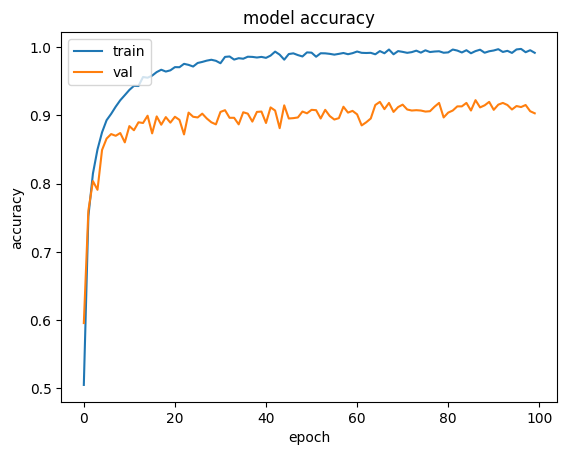

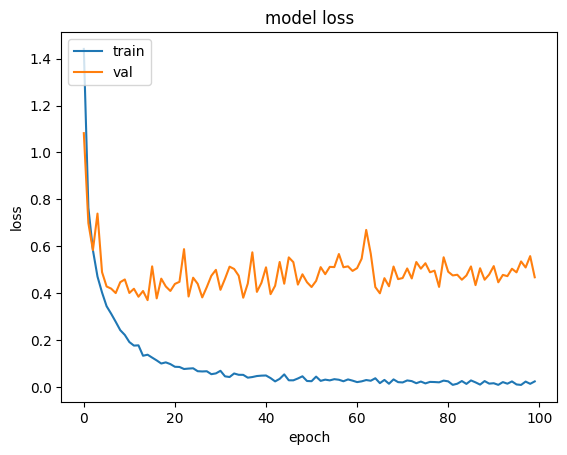

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 12ms/step
True Classes: 
 [ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  9  9  9
  9  9  5  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8 10
 10 10 10 10]
Predicted Classes: 
 [ 1 10  1  1  1  2  2  3  2  2  3  3  1  3  3  3  4  4  4  4  3  3  9  4
  2  9  5  5  1  5  5  5  2  6  6  6  6  7  3  7  7  3  8  8  8  7  8 10
 10 10 10  2]


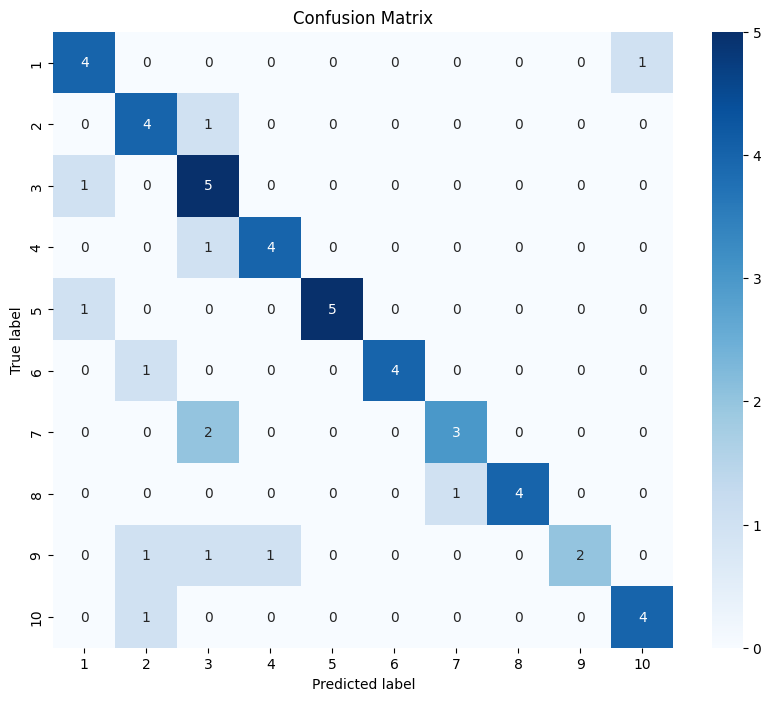

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Nhãn thực tế
true_classes = np.concatenate([y.numpy() for _, y in test])  # Gộp nhãn từ các batch
true_classes = np.argmax(true_classes, axis=1)
true_classes += 1
predicted_classes += 1
# Tính ma trận
cm = confusion_matrix(true_classes, predicted_classes)
# Hiển thị nhãn dự đoán và nhãn thực tế
print("True Classes: \n", true_classes)
print("Predicted Classes: \n", predicted_classes)
# Vẽ ma trận 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, cm.shape[1]+1), yticklabels=np.arange(1, cm.shape[0]+1))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# DCGAN

In [69]:
# Mixing train and valid sets together first, perform augmentation, and then splitting
def augment_images_shuffle(label, transform, aug_version, 
                           total_size=10000, train_size=700,
                           extra_transform=None):
    # Setup relevant folder paths    
    input_folder_train = f'{TRAIN_DATA_CLEAN}/{label}'
    input_folder_valid = f'{TRAIN_DATA_CLEAN}/{label}'
    
    # Create temporary folder for input images specific label (with all train and val images)
    temp_folder = f'augmented_{aug_version}/temp_{label}'
    
    Path(temp_folder).mkdir(parents=True, exist_ok=True)
   
    # Copy all clean images into temp folder
    input_folders = [input_folder_train, input_folder_valid]
    
    for input_folder in input_folders:
        for image in os.listdir(input_folder):
            # Copy the contents of source to destination 
            dataset_type = input_folder.split('/')[-2] # Train or valid set
            shutil.copy(f'{input_folder}/{image}', temp_folder)

    # Create output folder paths
    output_folder_train = f'Data-centric/clean/DCGAN/augmented_{aug_version}/train/{label}'
    output_folder_val = f'Data-centric/clean/DCGAN/augmented_{aug_version}/val/{label}'
    Path(output_folder_train).mkdir(parents=True, exist_ok=True)
    Path(output_folder_val).mkdir(parents=True, exist_ok=True)
        
    input_files = glob(os.path.join(temp_folder, "*.png"))
    print(f'Created temp folder: {temp_folder}')
    
    # For every image, do random transformations until hit the 1000 image mark (for each label)
    temp_folder_count = len(os.listdir(temp_folder))
    
    # Calculate number of additional images to generate to top up to 1000 images
    balance_count = total_size - temp_folder_count

    n = 0
    for i in range(balance_count):
        n += 1
        random_index = random.choice(range(len(input_files)))
        random_file = input_files[random_index]
        img_random = Image.open(random_file)
        img_random = ImageOps.grayscale(img_random)

        # Execute transformation (IAA)
        try:
            transformed_img_random = transform(img_random)
        except:
            transformed_img_random = transform(images=np.asarray(img_random))   
            
        # Perform additional morphological operation (e.g. CV2 morphs)
        if extra_transform is not None:
            transformed_img_random = extra_transform(transformed_img_random)
        
        # Convert back to PIL to save
        transformed_img_random = Image.fromarray(transformed_img_random)       
        transformed_img_random.save(f'{temp_folder}/{label}_random_{n}.png', 'PNG')
        
    # Random assign images into train and validation folders (for each label) for final split
    full_img_list = [file for file in os.listdir(temp_folder)]
    print(len(full_img_list))
    train_list = random.sample(full_img_list, train_size)
    val_list = [x for x in full_img_list if x not in train_list]

    for file in train_list:
        shutil.copy(os.path.join(temp_folder, file), output_folder_train)
    for file in val_list:
        shutil.copy(os.path.join(temp_folder, file), output_folder_val)
    
    # Delete temporary folder
    shutil.rmtree(temp_folder, ignore_errors=True)

In [70]:
# Set labels for specific augmentations
target_labels = ['i','ii','iii','iv','v','vi','vii','viii','ix','x'] # List of all labels

labels_no_flip = ['iv','vi','vii','viii'] # No flipping
labels_h_flip = ['v'] # Horizontal flip
labels_v_flip = ['ix'] # Vertical flip
labels_h_and_v_flip = ['i','ii','iii','x'] # Both horizontal and vertical flips

for target_label in target_labels:
    if target_label in labels_no_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5a, # Indicate type of augmentation sequence
                                aug_version='DCGAN', # Specify version number of experiment
                                train_size=8000) # Creating a 80/20 train/val split
        
    elif target_label in labels_h_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5b, 
                                aug_version='DCGAN',
                                train_size=8000)
        
    elif target_label in labels_v_flip:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5c, 
                                aug_version='DCGAN',
                                train_size=8000)
        
    else:
        augment_images_shuffle(label=target_label, 
                                transform=transform_v5d, 
                                aug_version='DCGAN',
                                train_size=8000)

Created temp folder: augmented_DCGAN/temp_i
10000
Created temp folder: augmented_DCGAN/temp_ii
10000
Created temp folder: augmented_DCGAN/temp_iii
10000
Created temp folder: augmented_DCGAN/temp_iv
10000
Created temp folder: augmented_DCGAN/temp_v
10000
Created temp folder: augmented_DCGAN/temp_vi
10000
Created temp folder: augmented_DCGAN/temp_vii
10000
Created temp folder: augmented_DCGAN/temp_viii
10000
Created temp folder: augmented_DCGAN/temp_ix
10000
Created temp folder: augmented_DCGAN/temp_x
10000


In [71]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn tới thư mục gốc
base_dir = 'Data-centric/clean/DCGAN/augmented_DCGAN'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
combined_dir = os.path.join(base_dir, 'combined_73')

# Tạo thư mục combined nếu chưa có
if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

# Gộp các ảnh từ train và val vào một thư mục combined
for subdir in os.listdir(train_dir):
    train_subdir = os.path.join(train_dir, subdir)
    val_subdir = os.path.join(val_dir, subdir)
    combined_subdir = os.path.join(combined_dir, subdir)
    
    if not os.path.exists(combined_subdir):
        os.makedirs(combined_subdir)
    
    # Copy ảnh từ train
    for file in os.listdir(train_subdir):
        shutil.copy(os.path.join(train_subdir, file), os.path.join(combined_subdir, file))
    
    # Copy ảnh từ val
    for file in os.listdir(val_subdir):
        shutil.copy(os.path.join(val_subdir, file), os.path.join(combined_subdir, file))


In [39]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets,transforms
from PIL import Image

# Định nghĩa các tham số
img_height = 64
img_width = 64
channels = 1  # Ảnh xám
latent_dim = 100  # Kích thước vector ngẫu nhiên

# Đường dẫn đến thư mục dữ liệu
data_dir = 'Data-centric/clean/DCGAN/augmented_DCGAN/combined_73'  # Thay bằng đường dẫn của bạn

# Tạo dataset
class RomanNumeralsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for label in range(1, 11):  # i=1, ii=2, ..., x=10
            class_dir = os.path.join(data_dir, str(label))
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                self.images.append(img_path)
                self.labels.append(label - 1)  # Chuyển đổi label về 0-indexed

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('L')  # Chuyển đổi thành ảnh xám
        if self.transform:
            image = self.transform(image)
        return image

transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize về [-1, 1]
])

dataset = RomanNumeralsDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)


In [40]:
# Tạo Dataset tùy chỉnh
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = [os.path.join(data_dir, img) for img in os.listdir(data_dir) if img.endswith(('png', 'jpg', 'jpeg'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert("L")  # Chuyển đổi sang ảnh đen trắng
        if self.transform:
            image = self.transform(image)
        return image

# Đường dẫn tới thư mục chứa ảnh của lớp 3
data_dir = 'Data-centric/clean/DCGAN/augmented_DCGAN/combined_73/3'

# Thiết lập các biến chuyển đổi
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Thay đổi kích thước nếu cần
    transforms.ToTensor(),         # Chuyển đổi thành Tensor
])

# Tạo DataLoader cho lớp 3
dataset = CustomDataset(data_dir=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  # Thay đổi batch_size nếu cần

In [56]:
import torch.nn as nn

# Tạo Generator với 8 lớp
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256 * 8 * 8),   # 1. Lớp Linear
            nn.ReLU(True),                        # 2. ReLU
            nn.Unflatten(1, (256, 8, 8)),         # 3. Unflatten thành (256, 8, 8)

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 4. ConvTranspose2d
            nn.BatchNorm2d(128),                  # 5. BatchNorm
            nn.ReLU(True),                        # 6. ReLU
            
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 7. ConvTranspose2d
            nn.BatchNorm2d(64),                   # 8. BatchNorm
            nn.ReLU(True),

            nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1), # Tầng cuối cùng để tạo ảnh
            nn.Tanh()                             # Đầu ra trong khoảng [-1, 1]
        )

    def forward(self, z):
        return self.model(z)

# Tạo Discriminator với 5 lớp
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(channels, 64, kernel_size=4, stride=2, padding=1),  # 1. Lớp Conv2d
            nn.LeakyReLU(0.2),                                            # 2. Lớp LeakyReLU
            
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),       # 3. Lớp Conv2d
            nn.LeakyReLU(0.2),                                            # 4. Lớp LeakyReLU
            
            nn.Flatten(),                                                 # 5. Lớp Flatten
            nn.Linear(128 * 16 * 16, 1),                                  # Lớp Linear (đưa vào)
            nn.Sigmoid()                                                  # Lớp Sigmoid (đầu ra)
        )

    def forward(self, img):
        return self.model(img)




In [57]:
# Hàm lưu checkpoint
def save_checkpoint(generator, discriminator, optimizer_g, optimizer_d, epoch, file_name='dcgan_checkpoint.pth'):
    torch.save({
        'epoch': epoch,
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'optimizer_g_state_dict': optimizer_g.state_dict(),
        'optimizer_d_state_dict': optimizer_d.state_dict(),
    }, file_name)

In [62]:
import time
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Hàm sinh và lưu ảnh
def generate_and_save_images(generator, epoch, output_dir='generated_images', num_samples=10):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    generator.eval()
    noise = torch.randn(num_samples, latent_dim).cuda()
    generated_images = generator(noise)
    generated_images = (generated_images + 1) / 2.0  # Chuyển đổi về [0, 1]

    for i in range(num_samples):
        img = generated_images[i].cpu().detach().numpy().squeeze()
        plt.imsave(f'{output_dir}/epoch_{epoch}_img_{i}.png', img, cmap='gray')

    generator.train()

# Cập nhật hàm huấn luyện DCGAN
def train_dcgan(epochs=600, checkpoint_file='dcgan_checkpoint.pth', best_checkpoint_file='best_dcgan_checkpoint.pth', save_image_every=50):
    generator = Generator().cuda()
    discriminator = Discriminator().cuda()

    # Định nghĩa Loss và Optimizer
    criterion = nn.BCELoss()
    optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.00005, betas=(0.5, 0.999))
    optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0005, betas=(0.5, 0.999))

    start_epoch = 0
    best_g_loss = float('inf')  # Biến để theo dõi G Loss tốt nhất

    # Kiểm tra nếu có checkpoint và load trạng thái
    if os.path.exists(checkpoint_file):
        checkpoint = torch.load(checkpoint_file)
        generator.load_state_dict(checkpoint['generator_state_dict'])
        discriminator.load_state_dict(checkpoint['discriminator_state_dict'])
        optimizer_g.load_state_dict(checkpoint['optimizer_g_state_dict'])
        optimizer_d.load_state_dict(checkpoint['optimizer_d_state_dict'])
        start_epoch = checkpoint['epoch']
        print(f"Checkpoint loaded, resuming from epoch {start_epoch}.")

    # Huấn luyện trong nhiều epoch
    for epoch in range(start_epoch, epochs):
        epoch_start_time = time.time()
        running_loss_d = 0.0
        running_loss_g = 0.0

        for i, real_images in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.cuda()

            # 1. Huấn luyện Discriminator
            optimizer_d.zero_grad()
            labels_real = torch.ones(batch_size, 1).cuda()
            output_real = discriminator(real_images)
            loss_d_real = criterion(output_real, labels_real)

            noise = torch.randn(batch_size, latent_dim).cuda()
            fake_images = generator(noise)
            labels_fake = torch.zeros(batch_size, 1).cuda()
            output_fake = discriminator(fake_images.detach())
            loss_d_fake = criterion(output_fake, labels_fake)

            loss_d = loss_d_real + loss_d_fake
            loss_d.backward()
            optimizer_d.step()

            # 2. Huấn luyện Generator
            optimizer_g.zero_grad()
            labels_g = torch.ones(batch_size, 1).cuda()
            output_g = discriminator(fake_images)
            loss_g = criterion(output_g, labels_g)
            loss_g.backward()
            optimizer_g.step()

            running_loss_d += loss_d.item()
            running_loss_g += loss_g.item()

            # In ra kết quả mỗi 100 batch
            if i % 100 == 0:
                batch_progress = (i + 1) / len(dataloader) * 100
                print(f"Epoch [{epoch + 1}/{epochs}] | Batch [{i}/{len(dataloader)}] "
                      f"Progress: {batch_progress:.2f}% | D Loss: {loss_d.item():.4f} | G Loss: {loss_g.item():.4f}")

        # Tính thời gian của mỗi epoch
        epoch_time = time.time() - epoch_start_time
        avg_loss_d = running_loss_d / len(dataloader)
        avg_loss_g = running_loss_g / len(dataloader)

        # In ra kết quả cuối mỗi epoch
        print(f"\nEpoch [{epoch + 1}] completed in {epoch_time:.2f}s")
        print(f"Average D Loss: {avg_loss_d:.4f} | Average G Loss: {avg_loss_g:.4f}\n")

        # Lưu checkpoint tốt nhất
        if avg_loss_g < best_g_loss:
            best_g_loss = avg_loss_g
            # Lưu checkpoint tốt nhất
            torch.save({
                'epoch': epoch + 1,
                'generator_state_dict': generator.state_dict(),
                'discriminator_state_dict': discriminator.state_dict(),
                'optimizer_g_state_dict': optimizer_g.state_dict(),
                'optimizer_d_state_dict': optimizer_d.state_dict(),
            }, best_checkpoint_file)
            print(f"Best checkpoint saved at epoch {epoch + 1} with G Loss: {avg_loss_g:.4f}.")

        # Lưu checkpoint sau mỗi epoch
        save_checkpoint(generator, discriminator, optimizer_g, optimizer_d, epoch + 1)
        print(f"Checkpoint saved at epoch {epoch + 1}.")

        # Sinh ảnh sau mỗi 5 epoch
        if (epoch + 1) % save_image_every == 0:
            generate_and_save_images(generator, epoch + 1)
            print(f"Generated and saved images at epoch {epoch + 1}.")


In [63]:
train_dcgan()

Checkpoint loaded, resuming from epoch 181.
Epoch [182/600] | Batch [0/313] Progress: 0.32% | D Loss: 100.0000 | G Loss: 0.0000
Epoch [182/600] | Batch [100/313] Progress: 32.27% | D Loss: 100.0000 | G Loss: 0.0000
Epoch [182/600] | Batch [200/313] Progress: 64.22% | D Loss: 100.0000 | G Loss: 0.0000
Epoch [182/600] | Batch [300/313] Progress: 96.17% | D Loss: 100.0000 | G Loss: 0.0000

Epoch [182] completed in 23.83s
Average D Loss: 100.0000 | Average G Loss: 0.0000

Best checkpoint saved at epoch 182 with G Loss: 0.0000.
Checkpoint saved at epoch 182.
Epoch [183/600] | Batch [0/313] Progress: 0.32% | D Loss: 100.0000 | G Loss: 0.0000
Epoch [183/600] | Batch [100/313] Progress: 32.27% | D Loss: 100.0000 | G Loss: 0.0000


KeyboardInterrupt: 

# Visualize

##  Phân tích kích thước ảnh 

In [26]:
folder_path = "Data-centric/data/train"

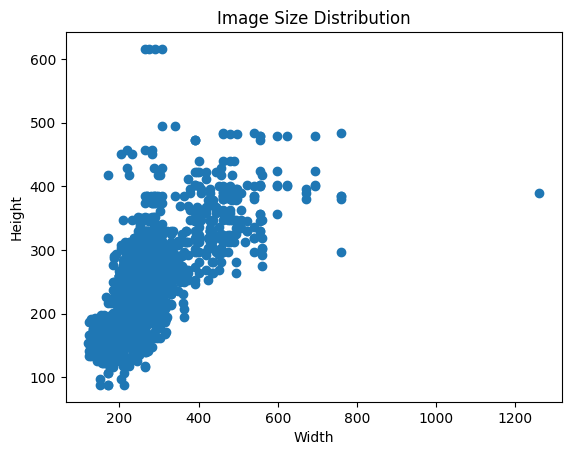

In [15]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Hàm để lấy kích thước của tất cả ảnh trong folder
def analyze_image_sizes(folder_path):
    widths = []
    heights = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for img_file in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
    
    return widths, heights

# Vẽ biểu đồ phân bố kích thước
def plot_image_sizes(widths, heights):
    plt.scatter(widths, heights)
    plt.title("Image Size Distribution")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.show()

folder_path = "Data-centric/data/train"
widths, heights = analyze_image_sizes(folder_path)
plot_image_sizes(widths, heights)


## Phân tích chất lượng ảnh

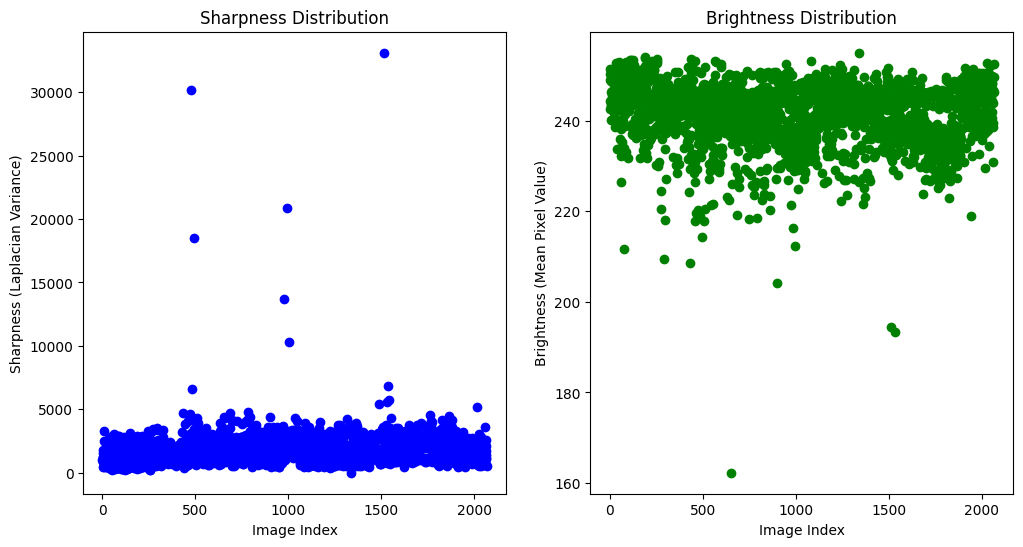

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hàm để phân tích chất lượng ảnh (độ sắc nét và độ sáng)
def analyze_image_quality(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()  # Độ sắc nét
    mean_brightness = np.mean(image)  # Độ sáng trung bình
    return laplacian_var, mean_brightness

# Hàm visualize chất lượng ảnh
def visualize_image_quality(folder_path):
    sharpness_list = []
    brightness_list = []
    image_files = []
    
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for img_file in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_file)
                laplacian_var, brightness = analyze_image_quality(img_path)
                sharpness_list.append(laplacian_var)
                brightness_list.append(brightness)
                image_files.append(img_file)
    
    # Hiển thị phân bố sharpness và brightness
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.scatter(range(len(sharpness_list)), sharpness_list, color='b', label='Sharpness')
    ax1.set_title("Sharpness Distribution")
    ax1.set_xlabel("Image Index")
    ax1.set_ylabel("Sharpness (Laplacian Variance)")
    
    ax2.scatter(range(len(brightness_list)), brightness_list, color='g', label='Brightness')
    ax2.set_title("Brightness Distribution")
    ax2.set_xlabel("Image Index")
    ax2.set_ylabel("Brightness (Mean Pixel Value)")
    
    plt.show()
visualize_image_quality(folder_path)


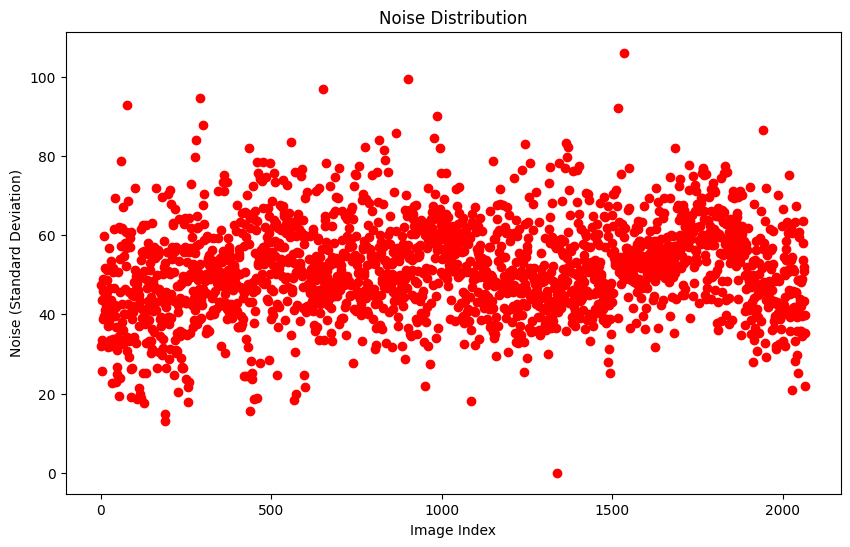

In [28]:
# Hàm để phân tích độ nhiễu (noise)
def analyze_noise(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    noise = np.std(image)  # Độ nhiễu (standard deviation)
    return noise

# Hàm visualize độ nhiễu
def visualize_noise(folder_path):
    noise_list = []
    image_files = []
    
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for img_file in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_file)
                noise = analyze_noise(img_path)
                noise_list.append(noise)
                image_files.append(img_file)
    
    # Hiển thị phân bố noise
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(noise_list)), noise_list, color='r', label='Noise')
    plt.title("Noise Distribution")
    plt.xlabel("Image Index")
    plt.ylabel("Noise (Standard Deviation)")
    plt.show()
visualize_noise(folder_path)


In [25]:
import imgaug.augmenters as iaa
import cv2
import numpy as np

def apply_random_transform(image_path):
    image = cv2.imread(image_path)
    sometimes = iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 1.0)))
    transformed_image = sometimes(image=image)
    return transformed_image

image_path = "Data-centric\data\train\i\abb7ae02-ce5d-11eb-b317-38f9d35ea60f.png"
transformed_image = apply_random_transform(image_path)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey(0)


AttributeError: 'NoneType' object has no attribute 'ndim'